In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express  as px
import os, seaborn as sns
from sklearn.preprocessing import LabelEncoder
import plotly.io as pio
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from scipy.stats import zscore
import optuna
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')
#Some Styling
pio.templates.default = "plotly_dark"
sns.set_style("darkgrid")  


In [4]:
os.listdir('C:/Users\gazur/Desktop/Polyfins_Intern-2023/dataset/forest-cover-type-prediction')

['sampleSubmission.csv', 'test.csv', 'test3.csv', 'train.csv']

In [5]:
train=pd.read_csv('C:/Users\gazur/Desktop/Polyfins_Intern-2023/dataset/forest-cover-type-prediction/train.csv')
test =pd.read_csv('C:/Users\gazur/Desktop/Polyfins_Intern-2023/dataset/forest-cover-type-prediction/test.csv')

train.drop("Id", axis = 1 , inplace = True)
test.drop(["Id"] , axis = 1 , inplace = True)

In [6]:
train.shape

(15120, 55)

In [39]:
# 0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,0,1,2,3,4,5,6,7,8,9,0,1,2,2,3,4,56,5,6,6,7,7,8,8,8,8,4,3,2,3,4,5,6,7,8,3



In [7]:
train

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0           2596      51      3                               258   
1           2590      56      2                               212   
2           2804     139      9                               268   
3           2785     155     18                               242   
4           2595      45      2                               153   
...          ...     ...    ...                               ...   
15115       2607     243     23                               258   
15116       2603     121     19                               633   
15117       2492     134     25                               365   
15118       2487     167     28                               218   
15119       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                   0                              510   
1                                  -6                              390   
2                                  65                             3180   
3                                 118                             3090   
4                                  -1                              391   
...                               ...                              ...   
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0                221             232            148   
1                220             235            151   
2                234             238            135   
3                238             238            122   
4                220             234            150   
...              ...             ...            ...   
15115            170             251            214   
15116            249             221             91   
15117            250             220             83   
15118            229             237            119   
15119            189             244            164   

       Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
0                                    6279  ...            0            0   
1                                    6225  ...            0            0   
2                                    6121  ...            0            0   
3                                    6211  ...            0            0   
4                                    6172  ...            0            0   
...                                   ...  ...          ...          ...   
15115                                1282  ...            0            0   
15116                                1325  ...            0            0   
15117                                1187  ...            0            0   
15118                                 932  ...            0            0   
15119                                 914  ...            0            0   

       Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
0                0            0            0            0            0   
1                0            0            0            0            0   
2                0            0            0            0            0   
3                0            0            0            0            0   
4                0            0            0            0            0   
...            ...          ...          ...          ...          ...   
15115            0            0            0            0            0   
15116            0            0            0            0            0   
15117            0            0            0     

In [1]:
#### create input for model serving

In [30]:
dig=train.iloc[115].drop('Cover_Type').values
data_as_strings = [str(num) for num in dig]
# Join the elements with commas to create the final string
result_string = ", ".join(data_as_strings)
numbers_without_spaces = result_string.replace(" ", "")
numbers_without_spaces

'3195,111,15,469,46,5941,245,222,101,1206,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0'

In [32]:
train['Cover_Type'][115]

1

In [41]:
train.shape, test.shape

((15120, 55), (565892, 54))

In [6]:
# NO categorical column
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           15120 non-null  int64
 1   Aspect                              15120 non-null  int64
 2   Slope                               15120 non-null  int64
 3   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 4   Vertical_Distance_To_Hydrology      15120 non-null  int64
 5   Horizontal_Distance_To_Roadways     15120 non-null  int64
 6   Hillshade_9am                       15120 non-null  int64
 7   Hillshade_Noon                      15120 non-null  int64
 8   Hillshade_3pm                       15120 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 10  Wilderness_Area1                    15120 non-null  int64
 11  Wilderness_Area2                    15120 non-null  int64
 12  Wild

In [7]:
train.describe()

Elevation        Aspect         Slope  \
count  15120.000000  15120.000000  15120.000000   
mean    2749.322553    156.676653     16.501587   
std      417.678187    110.085801      8.453927   
min     1863.000000      0.000000      0.000000   
25%     2376.000000     65.000000     10.000000   
50%     2752.000000    126.000000     15.000000   
75%     3104.000000    261.000000     22.000000   
max     3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  ...   Soil_Type32  \
count   15120.000000                        15120.000000  ...  15120.000000   
mean      135.091997                         1511.147288  ...      0.045635   
std        45.895189                         1099.936493  ...      0.208699   
min         0.000000                            0.000000  ...      0.000000   
25%       106.000000                          730.000000  ...      0.000000   
50%       138.000000                         1256.000000  ...      0.000000   
75%       167.000000                         1988.250000  ...      0.000000   
max       248.000000                         6993.000000  ...      1.000000   

        Soil_Type33   Soil_Type34   Soil_Type35   Soil_Type36   Soil_Type37  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.040741      0.001455      0.006746      0.000661      0.002249   
std        0.197696      0.038118      0.081859      0.025710      0.047368   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

        Soil_Type38   Soil_Type39   Soil_Type40    Cover_Type  
count  15120.000000  15120.000000  15120.000000  15120.000000  
mean       0.048148      0.043452      0.030357      4.000000  
std        0.214086      0.203880      0.171574      2.000066  
min        0.000000      0.000000      0.000000      1.000000  
25%        0.000000      0.000000      0.000000      2.000000  
50%        0.000000      0.000000      0.000000      4.000000  
75%        0.000000      0.000000      0.000000      6.000000  
max        1.000000      1.000000      1.000000      7.000000  

[8 rows x 55 columns]

In [8]:
# !pip install -U kaleido

In [9]:
fig =px.histogram(train, x='Cover_Type', color="Cover_Type", height=400, width=400)
fig.show("")

In [10]:
#NO missing values
train.isnull().sum().sort_values(ascending=True).head() 

Elevation      0
Soil_Type16    0
Soil_Type17    0
Soil_Type18    0
Soil_Type19    0
dtype: int64

In [98]:
len(train.columns)

73

In [4]:
Target = 'Cover_Type'
Features =[col for col in train.columns if col not in ['id', Target]]

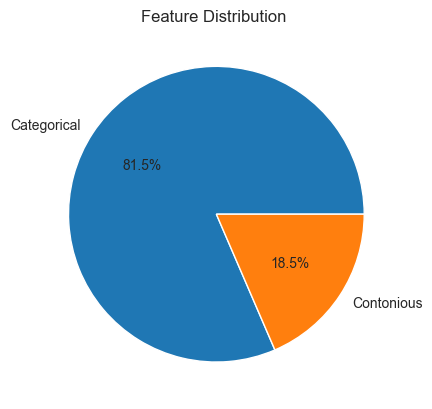

In [5]:
cat_feature=[col for col in Features if train[col].nunique() < 20]
cont_feature=[col for col in Features if train[col].nunique() >=20]

plt.pie([len(cat_feature), len(cont_feature)], labels=['Categorical', 'Contonious'], autopct='%1.1f%%')
plt.title('Feature Distribution ')
plt.show()

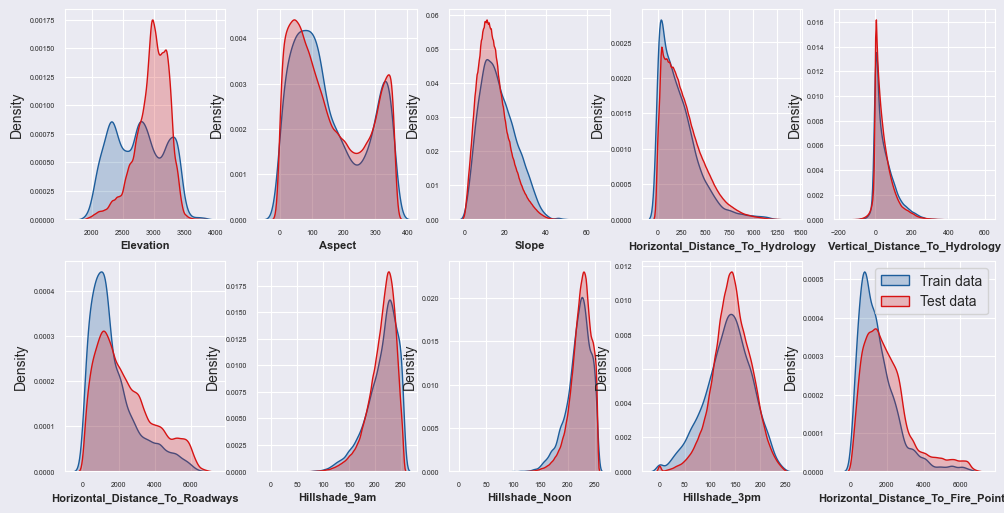

In [13]:
## Contonious feature distribution with KDE
rows=2
cols=5
fig, axes = plt.subplots(rows, cols, figsize=(12,6), facecolor ="#EAEAF2")
for r in range(rows):
    for c in range(cols):
        col = cont_feature[r*cols+c]
        sns.kdeplot(x=train[col], ax=axes[r, c], color='#1D5D9B', label='Train data',shade=True)
        sns.kdeplot(x=test[col], ax=axes[r, c], color='#D71313', label='Test data',shade=True)
        axes[r, c].set_xlabel(col, fontsize=8, fontweight='bold')
        axes[r, c].tick_params(labelsize=5, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(4)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
plt.legend()
plt.show()


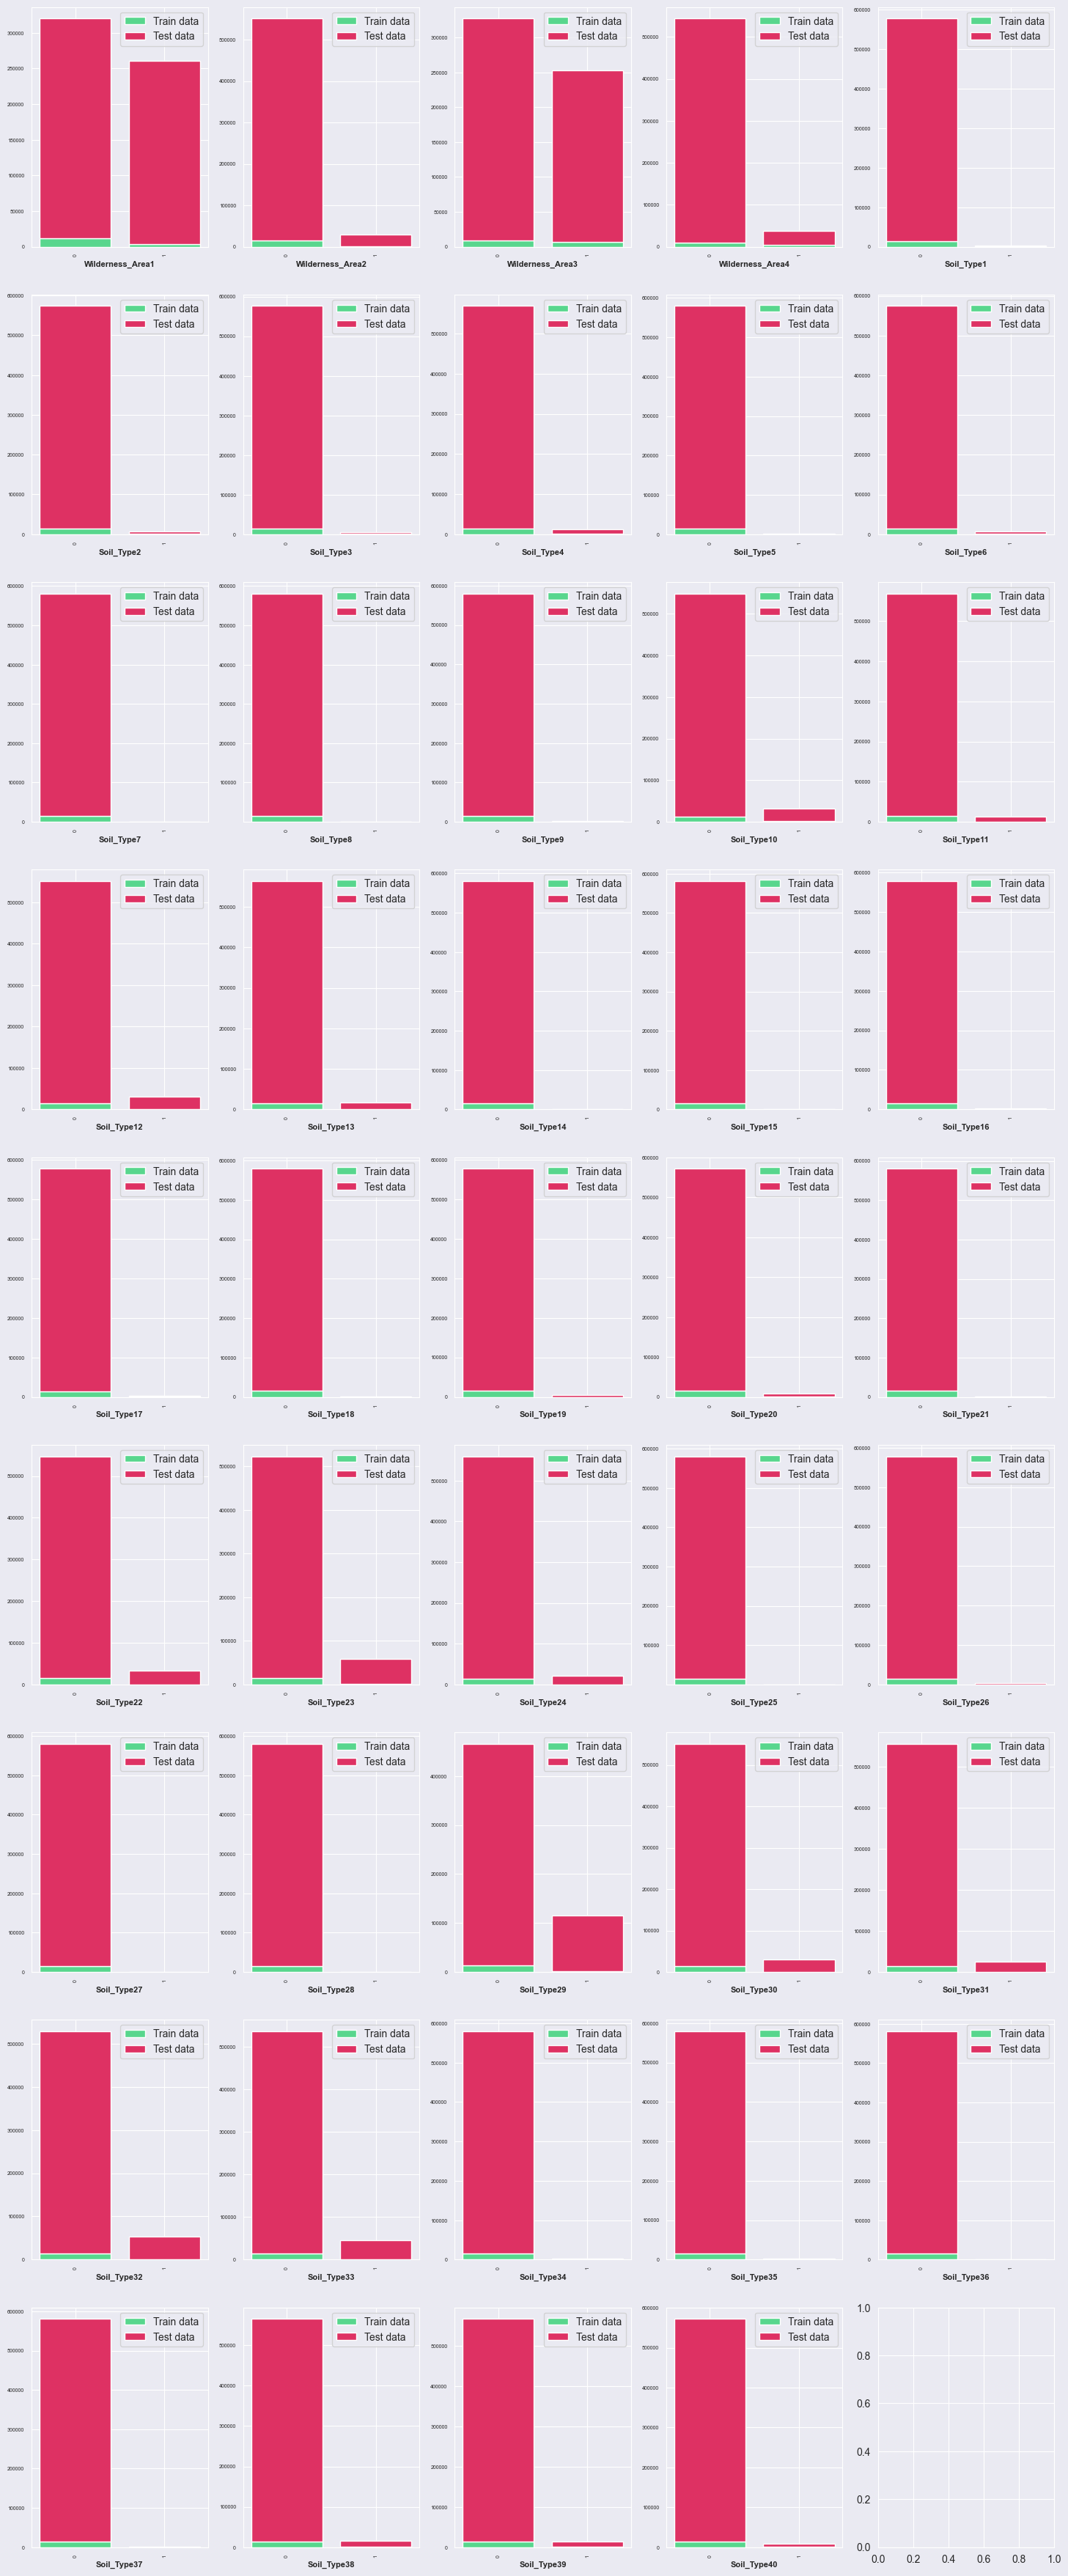

In [14]:
if len(cat_feature) == 0:
    print("No Categorical features")
else:
    ncols = 5
    nrows = int(len(cat_feature) / ncols + (len(cat_feature) % ncols > 0))

    fig, axes = plt.subplots(nrows, ncols, figsize=(18, 45), facecolor='#EAEAF2')

    for r in range(nrows):
        for c in range(ncols):
            if r * ncols + c >= len(cat_feature):
                break
            col = cat_feature[r * ncols + c]

            # Count occurrences of each category in both train and test data
            train_counts = train[col].value_counts()
            test_counts = test[col].value_counts()

            # Get all unique categories to ensure both train and test data have the same categories
            all_categories = set(train_counts.index) | set(test_counts.index)

            # Fill in any missing categories with 0 count
            train_counts = train_counts.reindex(all_categories, fill_value=0)
            test_counts = test_counts.reindex(all_categories, fill_value=0)

            # Create positions for the bars
            x = list(range(len(all_categories)))

            # Plot stacked bar plot for train and test data
            axes[r, c].bar(x, train_counts, color='#58D68D', label='Train data')
            axes[r, c].bar(x, test_counts, bottom=train_counts, color='#DE3163', label='Test data')

            axes[r, c].set_xticks(x)
            axes[r, c].set_xticklabels(all_categories, fontsize=6, rotation=90)
            axes[r, c].set_ylabel('')
            axes[r, c].set_xlabel(col, fontsize=8, fontweight='bold')
            axes[r, c].tick_params(labelsize=5, width=0.5)
            axes[r, c].xaxis.offsetText.set_fontsize(4)
            axes[r, c].yaxis.offsetText.set_fontsize(4)

            axes[r, c].legend(loc='upper right')

    plt.show()


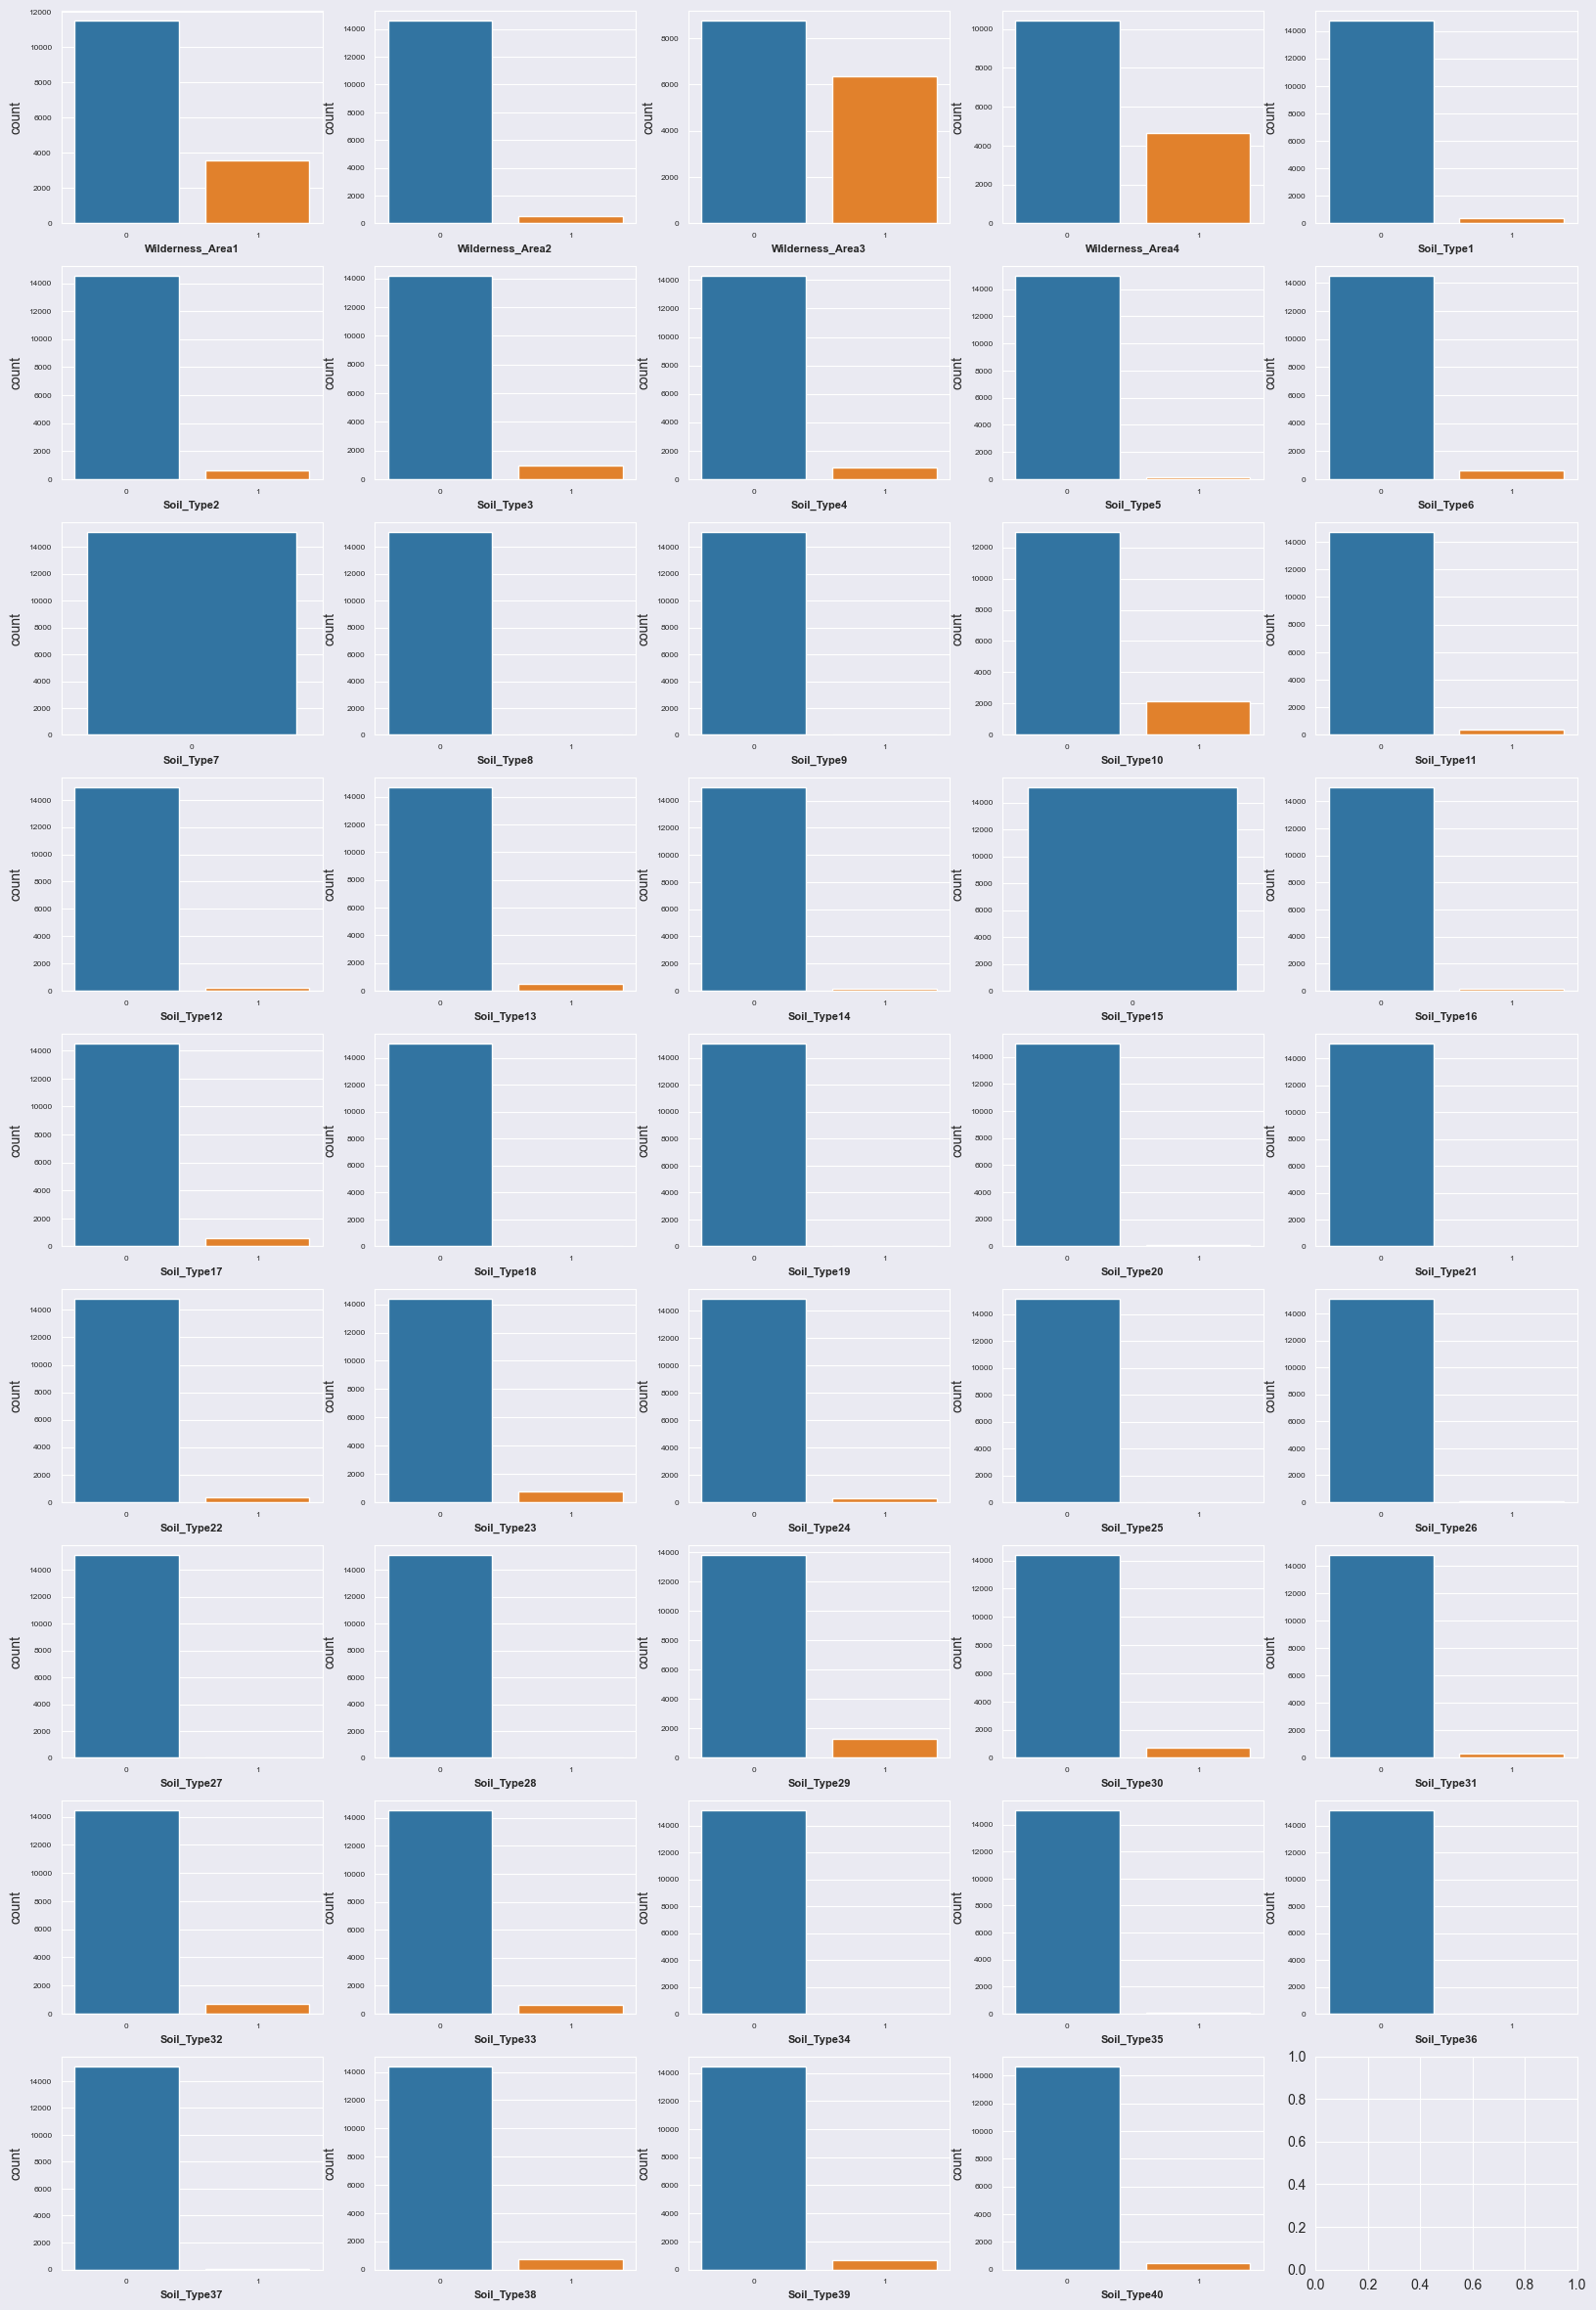

In [15]:
nrows = 9
ncols = 5
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 30), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        if r * ncols + c >= len(cat_feature):
                break
        col = cat_feature[r * ncols + c]
        sns.countplot(x=col, data=train, ax=axes[r, c])
        axes[r, c].set_xlabel(col, fontsize=8, fontweight='bold')  # Set column name as xlabel
        axes[r, c].tick_params(labelsize=6, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(4)
        axes[r, c].yaxis.offsetText.set_fontsize(4)

plt.show()

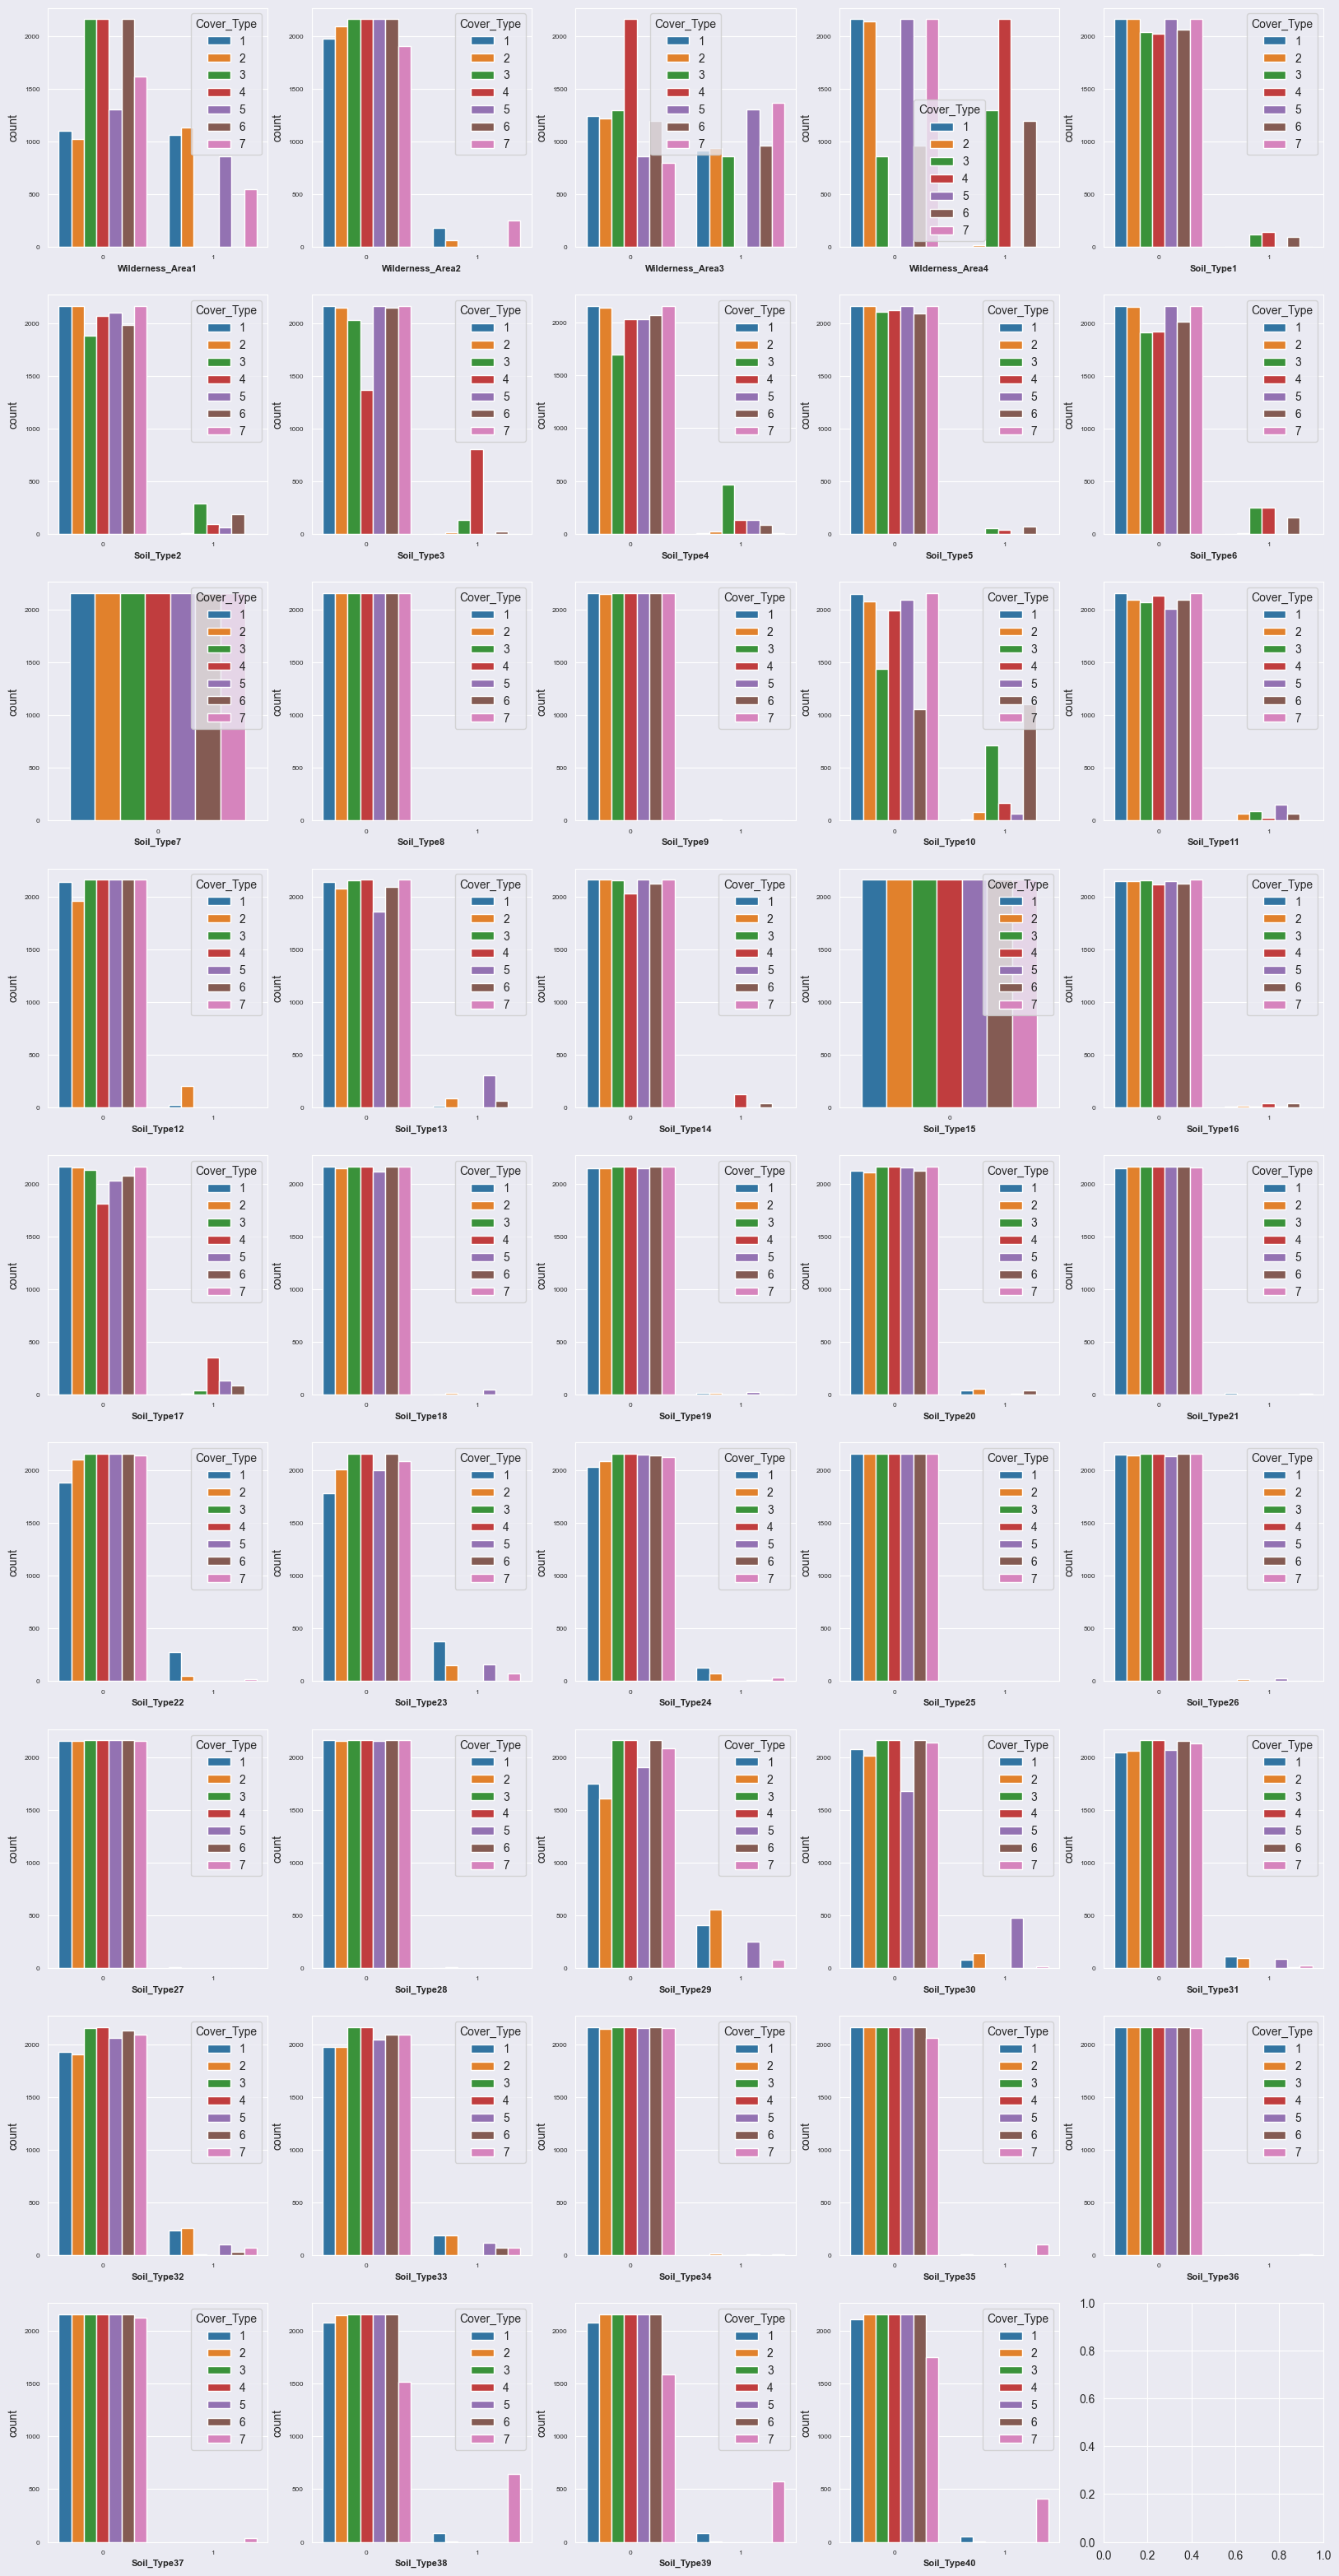

In [16]:
nrows = 9
ncols = 5
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 40), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        if r * ncols + c >= len(cat_feature):
                break
        col = cat_feature[r * ncols + c]
        sns.countplot(x=col, hue='Cover_Type', data=train, ax=axes[r, c])
        axes[r, c].set_xlabel(col, fontsize=8, fontweight='bold')  # Set column name as xlabel
        axes[r, c].tick_params(labelsize=6, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(4)
        axes[r, c].yaxis.offsetText.set_fontsize(4)

plt.show()

In [17]:
f=px.scatter(train,x="Elevation",y = "Slope", color='Cover_Type')
f.show()

In [18]:
f=px.scatter(train,x="Horizontal_Distance_To_Hydrology",y = "Vertical_Distance_To_Hydrology", color='Cover_Type')
f.show()

In [19]:
f=px.scatter(train,x="Aspect",y = "Hillshade_3pm", color='Cover_Type')
f.show()

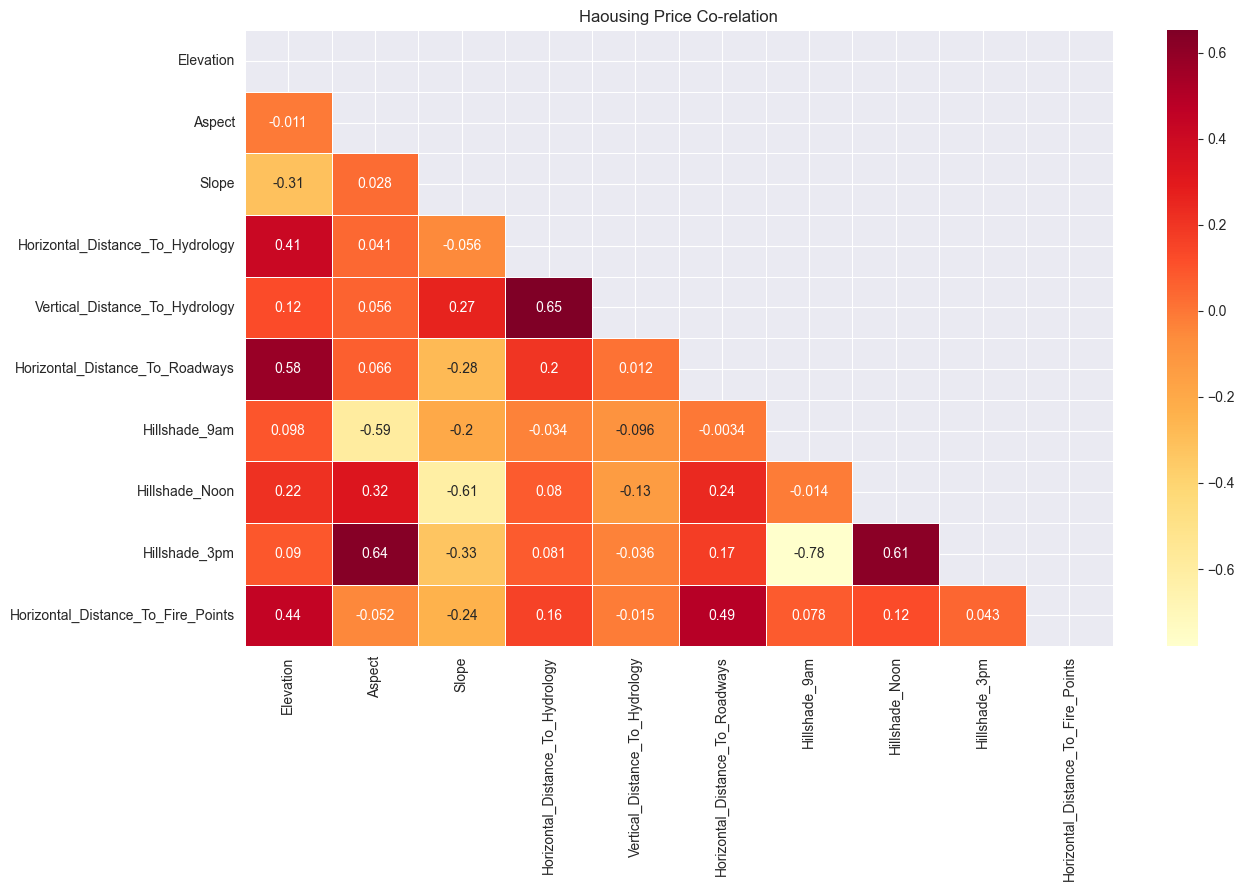

In [20]:
corr = train[cont_feature].corr()
fig, axes = plt.subplots(figsize=(14, 8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, linewidths=.5, cmap='YlOrRd', annot=True)
plt.title("Haousing Price Co-relation")
plt.show()

In [99]:
[col for col in df.columns]

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40',
 'EHiElv',
 'EViElv',
 'Highwater',
 'EVDtH',
 '

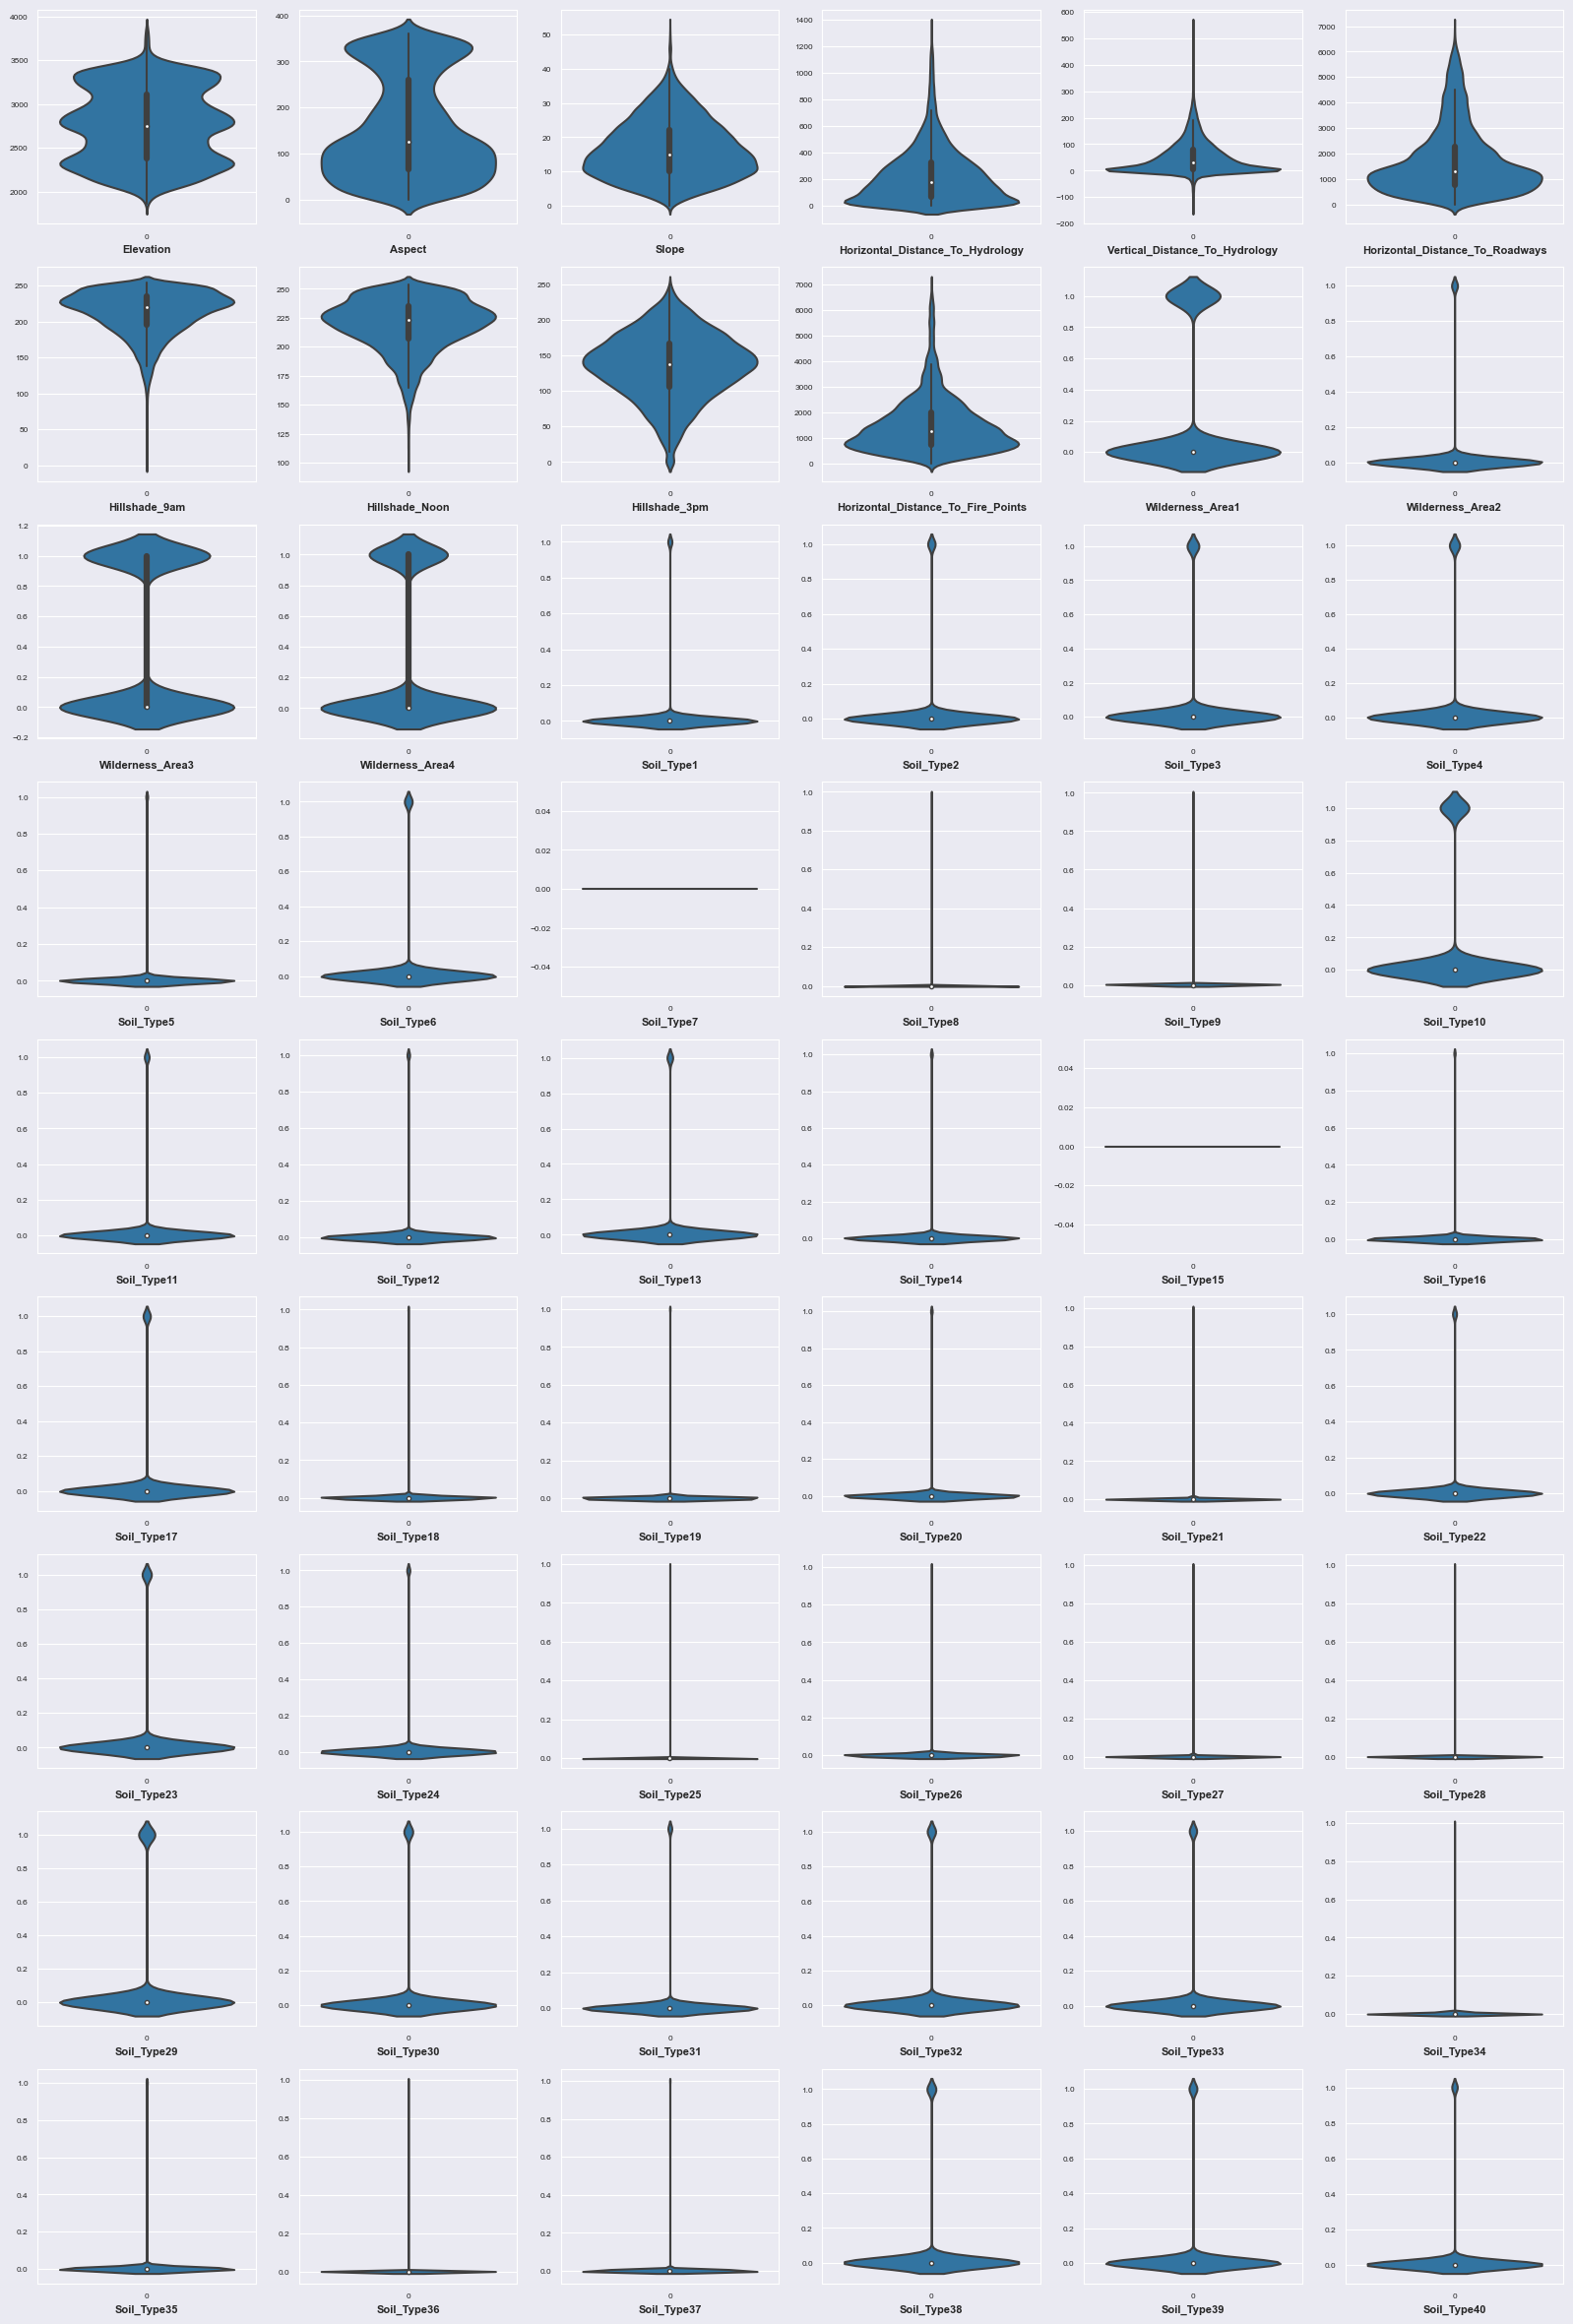

In [21]:
nrows = 9
ncols = 6
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 30), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = Features[r * ncols + c]
        sns.violinplot(train[col], ax=axes[r, c])  # Specify the subplot for each violin plot
        axes[r, c].set_xlabel(col, fontsize=8, fontweight='bold')  # Set column name as xlabel
        axes[r, c].tick_params(labelsize=6, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(4)
        axes[r, c].yaxis.offsetText.set_fontsize(4)


plt.show()


#### Apply two technique of this dataset
- Apply Model without Outliers
- Apply Model with feature Engineering

### Apply Model without Outliers

In [22]:
### Remove Outliers
def remove_outliers(df, z_thresh=3):  # common choice
    numeric_cols = df.select_dtypes('number')
    z_scores = numeric_cols.apply(zscore)
    outlier_indices = (z_scores > z_thresh).any(axis=1)
    # Remove the outliers from the DataFrame
    df_no_outliers = df.loc[~outlier_indices]
    return df_no_outliers
data = remove_outliers(train)
data

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
1810        2556     334     21                                85   
1814        2577     323     10                               150   
1856        2422      45     11                                85   
1920        2092      59     25                                90   
1937        2493     345     28                                60   
...          ...     ...    ...                               ...   
15108       2593      38     21                               120   
15109       2600      57     19                                 0   
15110       2508      33     26                                67   
15111       2610      59     17                                60   
15112       2600      38     25                               124   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
1810                               28                              819   
1814                               58                              875   
1856                               13                              631   
1920                               28                              150   
1937                               18                             1158   
...                               ...                              ...   
15108                              -6                              769   
15109                               0                              731   
15110                               1                              644   
15111                              10                              674   
15112                               0                              589   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
1810             168             208            176   
1814             194             230            175   
1856             223             215            125   
1920             230             178             66   
1937             155             184            161   
...              ...             ...            ...   
15108            215             190            101   
15109            229             197             93   
15110            204             173             91   
15111            231             202             98   
15112            212             178             89   

       Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
1810                                 1155  ...            0            0   
1814                                 1159  ...            0            0   
1856                                 1320  ...            0            0   
1920                                  503  ...            0            0   
1937                                 1690  ...            0            0   
...                                   ...  ...          ...          ...   
15108                                1266  ...            0            0   
15109                                1332  ...            0            0   
15110                                1385  ...            0            0   
15111                                1328  ...            0            0   
15112                                1261  ...            0            0   

       Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
1810             0            0            0            0            0   
1814             0            0            0            0            0   
1856             0            0            0            0            0   
1920             0            0            0            0            0   
1937             0            0            0            0            0   
...            ...          ...          ...          ...          ...   
15108            0            0            0            0            0   
15109            0            0            0            0            0   
15110            0            0            0     

In [23]:
df1=data.drop(['Soil_Type36','Soil_Type25','Soil_Type15','Soil_Type8','Soil_Type7','Cover_Type'], axis=1)
y=data['Cover_Type']

In [24]:
X_train, X_valid, y_train, y_valid = train_test_split(df1, y, test_size=0.2, random_state=2023)

#### Linear Classification

In [25]:
# standarized data 
sc=StandardScaler()
X1=sc.fit_transform(X_train)
X2=sc.fit_transform(X_valid)

In [26]:
classifier = LogisticRegression(C=1.0)
classifier.fit(X1,y_train)
predicted = classifier.predict(X2)
gl_acc=accuracy_score(y_valid, predicted)
gl_acc

0.6776470588235294

In [27]:
#precision
gl_pre = precision_score(y_valid,  predicted, average='weighted')

#### SVM

In [28]:
svc = SVC(C=1.0, probability=True)
svc.fit(X1,y_train)
y_pred=svc.predict(X2)
gs_acc=accuracy_score(y_pred, y_valid)
gs_acc

0.7670588235294118

In [29]:
#precision
gs_pre = precision_score(y_valid,  y_pred, average='weighted')

#### KNN

In [30]:
clf = KNeighborsClassifier(n_neighbors=15)
# Creating the model on Training Data
KNN=clf.fit(X1,y_train)
y_pred=KNN.predict(X2)
gk_acc=accuracy_score(y_pred, y_valid)
gk_acc

0.7623529411764706

In [31]:
#precision
gk_pre = precision_score(y_valid,  y_pred, average='weighted')

#### Decision Tree

In [32]:
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=20,criterion='gini')
# Printing all the parameters of Decision Trees
# print(clf)
DTree=clf.fit(X_train,y_train)
y_pred=DTree.predict(X_valid)
# print(metrics.classification_report(y_valid, y_pred))
gd_acc=accuracy_score(y_pred, y_valid)
gd_acc

0.7670588235294118

In [33]:
#precision
gd_pre = precision_score(y_valid,  y_pred, average='weighted')

#### AdaBoost

In [34]:
DTC=DecisionTreeClassifier(max_depth=2)
clf = AdaBoostClassifier(n_estimators=20, base_estimator=DTC ,learning_rate=0.01)
# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
y_pred=AB.predict(X_valid)
ga_acc=accuracy_score(y_pred, y_valid)
ga_acc

0.611764705882353

In [35]:
#precision
ga_pre = precision_score(y_valid,  y_pred, average='weighted')

#### MLP

In [36]:
# Create the MLP Classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', 
                               alpha=0.0001, batch_size='auto', learning_rate='constant',
                               learning_rate_init=0.001, max_iter=200, random_state=42)

# Train the model on the training data
mlp_classifier.fit(X1, y_train)

# Make predictions on the validation data
y_pred = mlp_classifier.predict(X2)

# Evaluate the model using accuracy score
gm_acc = accuracy_score(y_valid, y_pred)


#precision
gm_pre = precision_score(y_valid,  y_pred, average='weighted')
gm_acc

0.8423529411764706

#### Lightgbm without Outliers

In [37]:
lgb_params = {
    'objective' : 'multiclass',
    'metric' : 'multi_logloss',
    'device' : 'cpu',
}
model = LGBMClassifier(**lgb_params)
model.fit(X_train, y_train,
          eval_set=[(X_valid,y_valid)])

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000984 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1754
[LightGBM] [Info] Number of data points in the train set: 1699, number of used features: 12
[LightGBM] [Info] Start training from score -5.358354
[LightGBM] [Info] Start training from score -3.294660
[LightGBM] [Info] Start training from score -1.100969
[LightGBM] [Info] Start training from score -2.554993
[LightGBM] [Info] Start training from score -3.545975
[LightGBM] [Info] Start training from score -0.655603
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

LGBMClassifier(device='cpu', metric='multi_logloss', objective='multiclass')

In [38]:
preds_valid = model.predict(X_valid)
gg_acc = accuracy_score(y_valid,  preds_valid)
gg_acc

0.8352941176470589

In [39]:
#precision
gg_pre = precision_score(y_valid,  preds_valid, average='weighted')

#### XGBOOST

In [40]:
# Use Label encoder for the output variable
Le=LabelEncoder()
y1=Le.fit_transform(y_train)
y2=Le.fit_transform(y_valid)
# declare parameters
params = {
            'objective' : 'multi:softmax',
            'tree_method': 'hist',
            'eval_metric': 'mlogloss',
            'n_estimators':300,
            'predictor': 'cpu_predictor'
        }       
model = xgb.XGBClassifier(**params)
model.fit(X_train, y1,
          early_stopping_rounds=200,
          eval_set=[(X_valid,y2)],
          verbose=True)

[0]	validation_0-mlogloss:1.36025
[1]	validation_0-mlogloss:1.14121
[2]	validation_0-mlogloss:0.99117
[3]	validation_0-mlogloss:0.88383
[4]	validation_0-mlogloss:0.80118
[5]	validation_0-mlogloss:0.74350
[6]	validation_0-mlogloss:0.70063
[7]	validation_0-mlogloss:0.65531
[8]	validation_0-mlogloss:0.62938
[9]	validation_0-mlogloss:0.60948
[10]	validation_0-mlogloss:0.59534
[11]	validation_0-mlogloss:0.57514
[12]	validation_0-mlogloss:0.56300
[13]	validation_0-mlogloss:0.55117
[14]	validation_0-mlogloss:0.54129
[15]	validation_0-mlogloss:0.53186
[16]	validation_0-mlogloss:0.52486
[17]	validation_0-mlogloss:0.52140
[18]	validation_0-mlogloss:0.51515
[19]	validation_0-mlogloss:0.51283
[20]	validation_0-mlogloss:0.50957
[21]	validation_0-mlogloss:0.49716
[22]	validation_0-mlogloss:0.49595
[23]	validation_0-mlogloss:0.49285
[24]	validation_0-mlogloss:0.49129
[25]	validation_0-mlogloss:0.49024
[26]	validation_0-mlogloss:0.49134
[27]	validation_0-mlogloss:0.49078
[28]	validation_0-mlogloss:0.4

[231]	validation_0-mlogloss:0.58127
[232]	validation_0-mlogloss:0.58103
[233]	validation_0-mlogloss:0.58117
[234]	validation_0-mlogloss:0.58125
[235]	validation_0-mlogloss:0.58090
[236]	validation_0-mlogloss:0.58091
[237]	validation_0-mlogloss:0.58114
[238]	validation_0-mlogloss:0.58125
[239]	validation_0-mlogloss:0.58129
[240]	validation_0-mlogloss:0.58174
[241]	validation_0-mlogloss:0.58184
[242]	validation_0-mlogloss:0.58212
[243]	validation_0-mlogloss:0.58273
[244]	validation_0-mlogloss:0.58304
[245]	validation_0-mlogloss:0.58315
[246]	validation_0-mlogloss:0.58318


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax',
              predictor='cpu_predictor', ...)

In [41]:
preds=model.predict(X_valid)
gx_acc=accuracy_score(y2, preds)
gx_acc

0.8282352941176471

In [42]:
#precision
gx_pre = precision_score(y_valid,  preds, average='weighted')

#### Show Accuracy Table without Outliers

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


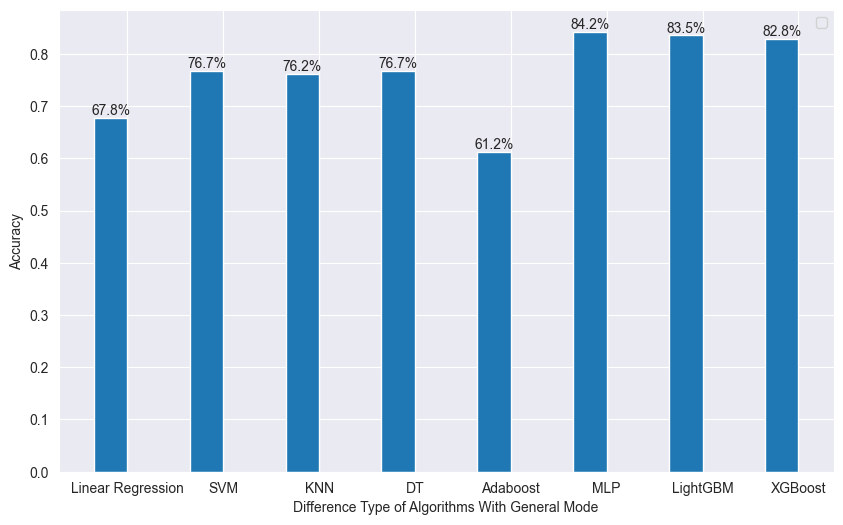

In [43]:
# Algorithms to compare
algorithms = ['Linear Regression', 'SVM', 'KNN', 'DT', 'Adaboost','MLP','LightGBM','XGBoost' ]

# mlp_score xg_score ada_score dt_score svr_score knn_score lr_score
acc =[gl_acc, gs_acc, gk_acc, gd_acc, ga_acc, gm_acc, gg_acc, gx_acc]

# Bar plot comparing precision with and without smoothing
plt.figure(figsize=(10, 6))
width = 0.35
bars1 = plt.bar(np.arange(len(algorithms)), acc, width)
plt.xticks(np.arange(len(algorithms)) + width / 2, algorithms)
plt.xlabel('Difference Type of Algorithms With General Mode')
plt.ylabel('Accuracy')


# Add percentage values on top of each bar
for bar in bars1:
    height1 = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height1, f'{height1:.1%}', ha='center', va='bottom')

plt.legend()
plt.show()

### Apply Model with Feature Engineering

In [9]:
def fe(df):
    df=df.drop(['Soil_Type15','Soil_Type7'], axis=1)
    df['EHiElv'] = df['Horizontal_Distance_To_Roadways'] * df['Elevation']
    df['EViElv'] = df['Vertical_Distance_To_Hydrology'] * df['Elevation']
    #the compass direction that a terrain faces
    df["Aspect"][df["Aspect"] < 0] += 360
    df["Aspect"][df["Aspect"] > 359] -= 360
    #Hillshade 3D representation of a surface,
    #It's a shade of grey so all the values must lie in the range (0, 255)
    df.loc[df["Hillshade_9am"] < 0, "Hillshade_9am"] = 0
    df.loc[df["Hillshade_Noon"] < 0, "Hillshade_Noon"] = 0
    df.loc[df["Hillshade_3pm"] < 0, "Hillshade_3pm"] = 0
    df.loc[df["Hillshade_9am"] > 255, "Hillshade_9am"] = 255
    df.loc[df["Hillshade_Noon"] > 255, "Hillshade_Noon"] = 255
    df.loc[df["Hillshade_3pm"] > 255, "Hillshade_3pm"] = 255
    return df
df3= fe(train)
df3.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type34  Soil_Type35  \
0                                6279  ...            0            0   
1                                6225  ...            0            0   
2                                6121  ...            0            0   
3                                6211  ...            0            0   
4                                6172  ...            0            0   

   Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Cover_Type   EHiElv  EViElv  
0           5  1323960       0  
1           5  1010100  -15540  
2           2  8916720  182260  
3           2  8605650  328630  
4           5  1014645   -2595  

[5 rows x 55 columns]

In [10]:
def fe2(df):
    Features =[col for col in df.columns]
    df['Highwater'] = (df.Vertical_Distance_To_Hydrology < 0).astype(int)
    df['EVDtH'] = df.Elevation - df.Vertical_Distance_To_Hydrology
    df['EHDtH'] = df.Elevation - df.Horizontal_Distance_To_Hydrology * 0.2
    df['Euclidean_Distance_to_Hydrolody'] = (df['Horizontal_Distance_To_Hydrology']**2 + df['Vertical_Distance_To_Hydrology']**2)**0.5
    df['Manhattan_Distance_to_Hydrolody'] = df['Horizontal_Distance_To_Hydrology'] + df['Vertical_Distance_To_Hydrology']
    df['Hydro_Fire_1'] = df['Horizontal_Distance_To_Hydrology'] + df['Horizontal_Distance_To_Fire_Points']
    df['Hydro_Fire_2'] = abs(df['Horizontal_Distance_To_Hydrology'] - df['Horizontal_Distance_To_Fire_Points'])
    df['Hydro_Road_1'] = abs(df['Horizontal_Distance_To_Hydrology'] + df['Horizontal_Distance_To_Roadways'])
    df['Hydro_Road_2'] = abs(df['Horizontal_Distance_To_Hydrology'] - df['Horizontal_Distance_To_Roadways'])
    df['Fire_Road_1'] = abs(df['Horizontal_Distance_To_Fire_Points'] + df['Horizontal_Distance_To_Roadways'])
    df['Fire_Road_2'] = abs(df['Horizontal_Distance_To_Fire_Points'] - df['Horizontal_Distance_To_Roadways'])
    df['Hillshade_3pm_is_zero'] = (df.Hillshade_3pm == 0).astype(int)
    df['min']=df[Features].min(axis=1)
    df['max']=df[Features].max(axis=1)
    df['mean']=df[Features].mean(axis=1)
    df['std']=df[Features].std(axis=1)
    return df
data = fe2(df3)
data

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0           2596      51      3                               258   
1           2590      56      2                               212   
2           2804     139      9                               268   
3           2785     155     18                               242   
4           2595      45      2                               153   
...          ...     ...    ...                               ...   
15115       2607     243     23                               258   
15116       2603     121     19                               633   
15117       2492     134     25                               365   
15118       2487     167     28                               218   
15119       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                   0                              510   
1                                  -6                              390   
2                                  65                             3180   
3                                 118                             3090   
4                                  -1                              391   
...                               ...                              ...   
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0                221             232            148   
1                220             235            151   
2                234             238            135   
3                238             238            122   
4                220             234            150   
...              ...             ...            ...   
15115            170             251            214   
15116            249             221             91   
15117            250             220             83   
15118            229             237            119   
15119            189             244            164   

       Horizontal_Distance_To_Fire_Points  ...  Hydro_Fire_2  Hydro_Road_1  \
0                                    6279  ...          6021           768   
1                                    6225  ...          6013           602   
2                                    6121  ...          5853          3448   
3                                    6211  ...          5969          3332   
4                                    6172  ...          6019           544   
...                                   ...  ...           ...           ...   
15115                                1282  ...          1024           918   
15116                                1325  ...           692          1251   
15117                                1187  ...           822           700   
15118                                 932  ...           714           460   
15119                                 914  ...           595           589   

       Hydro_Road_2  Fire_Road_1  Fire_Road_2  Hillshade_3pm_is_zero    min  \
0               252         6789         5769                      0      0   
1               178         6615         5835                      0 -15540   
2              2912         9301         2941                      0      0   
3              2848         9301         3121                      0      0   
4               238         6563         5781                      0  -2595   
...             ...          ...          ...                    ...    ...   
15115           402         1942          622                      0      0   
15116            15         1943          707              

In [11]:
df=data.drop('Cover_Type', axis=1)
y=data['Cover_Type']
X_train, X_valid, y_train, y_valid = train_test_split(df, y, test_size=0.2, random_state=2023)

#### Linear Classification

In [19]:
# standarized data 
sc=StandardScaler()
X1=sc.fit_transform(X_train)
X2=sc.fit_transform(X_valid)

In [42]:
Linear_classification = LogisticRegression(C=1.0)
Linear_classification.fit(X1,y_train)
predicted = Linear_classification.predict(X2)
ol_acc=accuracy_score(y_valid, predicted)
ol_acc

0.7146164021164021

In [43]:
#precision
ol_pre = precision_score(y_valid,  predicted, average='weighted')

#### SVM

In [44]:
svc = SVC(C=1.0, probability=True)
svc.fit(X1,y_train)
y_pred=svc.predict(X2)
os_acc=accuracy_score(y_pred, y_valid)
os_acc

0.7605820105820106

In [45]:
#precision
os_pre = precision_score(y_valid,  y_pred, average='weighted')

#### KNN

In [46]:
KNN = KNeighborsClassifier(n_neighbors=15)
# Creating the model on Training Data
KNN.fit(X1,y_train)
y_pred=KNN.predict(X2)
ok_acc=accuracy_score(y_pred, y_valid)
ok_acc

0.7506613756613757

In [47]:
#precision
ok_pre = precision_score(y_valid,  y_pred, average='weighted')

#### Decision Tree

In [48]:
#choose from different tunable hyper parameters
decision_Tree= tree.DecisionTreeClassifier(max_depth=20,criterion='gini')
# Printing all the parameters of Decision Trees
# print(clf)
DTree=decision_Tree.fit(X_train,y_train)
y_pred=DTree.predict(X_valid)
# print(metrics.classification_report(y_valid, y_pred))
od_acc=accuracy_score(y_pred, y_valid)
od_acc

0.8072089947089947

In [49]:
#precision
od_pre = precision_score(y_valid,  y_pred, average='weighted')

#### AdaBoost

In [50]:
DTC=DecisionTreeClassifier(max_depth=2)
clf = AdaBoostClassifier(n_estimators=20, base_estimator=DTC ,learning_rate=0.01)
# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
y_pred=AB.predict(X_valid)
oa_acc=accuracy_score(y_pred, y_valid)
oa_acc

0.5962301587301587

In [51]:
#precision
oa_pre = precision_score(y_valid,  y_pred, average='weighted')

#### Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_valid)

# Evaluate the accuracy of the model
orf_acc = accuracy_score(y_valid, y_pred)
print("Accuracy:", orf_acc)

Accuracy: 0.8978174603174603


In [52]:
#precision
orf_pre = precision_score(y_valid,  y_pred, average='weighted')

In [14]:
import pickle
filename = 'ranforest_model.pkl'
pickle.dump(rf, open(filename, 'wb'))

##### MLP

In [20]:
# Create the MLP Classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', 
                               alpha=0.0001, batch_size='auto', learning_rate='constant',
                               learning_rate_init=0.001, max_iter=200, random_state=42)

# Train the model on the training data
mlp_classifier.fit(X1, y_train)

# Make predictions on the validation data
y_pred = mlp_classifier.predict(X2)

# Evaluate the model using accuracy score
om_acc = accuracy_score(y_valid, y_pred)


#precision
om_pre = precision_score(y_valid,  y_pred, average='weighted')
om_acc


0.8482142857142857

In [21]:
filename = 'model_mlp.pkl'
pickle.dump(mlp_classifier, open(filename, 'wb'))

#### Catboost

In [152]:
# !pip install catboost

In [154]:
from catboost import CatBoostClassifier
models_cat = CatBoostClassifier()
models_cat.fit(X_train, y_train)

Learning rate set to 0.089854
0:	learn: 1.7510686	total: 171ms	remaining: 2m 50s
1:	learn: 1.6139028	total: 203ms	remaining: 1m 41s
2:	learn: 1.5017410	total: 244ms	remaining: 1m 20s
3:	learn: 1.4158101	total: 276ms	remaining: 1m 8s
4:	learn: 1.3436527	total: 305ms	remaining: 1m
5:	learn: 1.2810258	total: 334ms	remaining: 55.4s
6:	learn: 1.2241192	total: 364ms	remaining: 51.6s
7:	learn: 1.1748766	total: 392ms	remaining: 48.7s
8:	learn: 1.1281618	total: 424ms	remaining: 46.7s
9:	learn: 1.0923869	total: 461ms	remaining: 45.7s
10:	learn: 1.0561651	total: 492ms	remaining: 44.3s
11:	learn: 1.0299641	total: 522ms	remaining: 43s
12:	learn: 1.0015876	total: 552ms	remaining: 41.9s
13:	learn: 0.9776119	total: 582ms	remaining: 41s
14:	learn: 0.9549734	total: 612ms	remaining: 40.2s
15:	learn: 0.9359995	total: 646ms	remaining: 39.7s
16:	learn: 0.9174267	total: 683ms	remaining: 39.5s
17:	learn: 0.8992061	total: 713ms	remaining: 38.9s
18:	learn: 0.8821648	total: 742ms	remaining: 38.3s
19:	learn: 0.86

165:	learn: 0.4736863	total: 5.31s	remaining: 26.7s
166:	learn: 0.4729581	total: 5.37s	remaining: 26.8s
167:	learn: 0.4712241	total: 5.42s	remaining: 26.9s
168:	learn: 0.4698694	total: 5.47s	remaining: 26.9s
169:	learn: 0.4690680	total: 5.52s	remaining: 26.9s
170:	learn: 0.4680770	total: 5.56s	remaining: 27s
171:	learn: 0.4672689	total: 5.59s	remaining: 26.9s
172:	learn: 0.4660579	total: 5.62s	remaining: 26.9s
173:	learn: 0.4648763	total: 5.65s	remaining: 26.8s
174:	learn: 0.4638871	total: 5.68s	remaining: 26.8s
175:	learn: 0.4629859	total: 5.71s	remaining: 26.8s
176:	learn: 0.4624651	total: 5.75s	remaining: 26.7s
177:	learn: 0.4617145	total: 5.78s	remaining: 26.7s
178:	learn: 0.4606962	total: 5.81s	remaining: 26.7s
179:	learn: 0.4600748	total: 5.84s	remaining: 26.6s
180:	learn: 0.4588357	total: 5.87s	remaining: 26.6s
181:	learn: 0.4575407	total: 5.9s	remaining: 26.5s
182:	learn: 0.4568432	total: 5.93s	remaining: 26.5s
183:	learn: 0.4556577	total: 5.96s	remaining: 26.5s
184:	learn: 0.4

328:	learn: 0.3650881	total: 10.9s	remaining: 22.2s
329:	learn: 0.3642269	total: 10.9s	remaining: 22.2s
330:	learn: 0.3636680	total: 11s	remaining: 22.2s
331:	learn: 0.3631337	total: 11s	remaining: 22.2s
332:	learn: 0.3626591	total: 11.1s	remaining: 22.2s
333:	learn: 0.3621228	total: 11.1s	remaining: 22.1s
334:	learn: 0.3613280	total: 11.1s	remaining: 22.1s
335:	learn: 0.3612133	total: 11.2s	remaining: 22.1s
336:	learn: 0.3606708	total: 11.2s	remaining: 22.1s
337:	learn: 0.3604515	total: 11.3s	remaining: 22.1s
338:	learn: 0.3599796	total: 11.3s	remaining: 22s
339:	learn: 0.3594609	total: 11.3s	remaining: 22s
340:	learn: 0.3590420	total: 11.4s	remaining: 22s
341:	learn: 0.3586774	total: 11.4s	remaining: 22s
342:	learn: 0.3583286	total: 11.5s	remaining: 22s
343:	learn: 0.3576953	total: 11.5s	remaining: 21.9s
344:	learn: 0.3571415	total: 11.5s	remaining: 21.9s
345:	learn: 0.3569634	total: 11.6s	remaining: 21.9s
346:	learn: 0.3566703	total: 11.6s	remaining: 21.8s
347:	learn: 0.3562204	tota

490:	learn: 0.3048153	total: 17.1s	remaining: 17.7s
491:	learn: 0.3044502	total: 17.2s	remaining: 17.7s
492:	learn: 0.3041610	total: 17.2s	remaining: 17.7s
493:	learn: 0.3038471	total: 17.2s	remaining: 17.7s
494:	learn: 0.3034756	total: 17.3s	remaining: 17.6s
495:	learn: 0.3032780	total: 17.3s	remaining: 17.6s
496:	learn: 0.3029690	total: 17.4s	remaining: 17.6s
497:	learn: 0.3027783	total: 17.4s	remaining: 17.5s
498:	learn: 0.3022386	total: 17.4s	remaining: 17.5s
499:	learn: 0.3020332	total: 17.5s	remaining: 17.5s
500:	learn: 0.3017113	total: 17.5s	remaining: 17.4s
501:	learn: 0.3015160	total: 17.5s	remaining: 17.4s
502:	learn: 0.3012703	total: 17.6s	remaining: 17.4s
503:	learn: 0.3010962	total: 17.6s	remaining: 17.4s
504:	learn: 0.3009458	total: 17.7s	remaining: 17.3s
505:	learn: 0.3007566	total: 17.7s	remaining: 17.3s
506:	learn: 0.3005405	total: 17.8s	remaining: 17.3s
507:	learn: 0.3003552	total: 17.8s	remaining: 17.3s
508:	learn: 0.3001414	total: 17.9s	remaining: 17.2s
509:	learn: 

653:	learn: 0.2642257	total: 24.5s	remaining: 13s
654:	learn: 0.2641127	total: 24.6s	remaining: 13s
655:	learn: 0.2638791	total: 24.6s	remaining: 12.9s
656:	learn: 0.2637373	total: 24.7s	remaining: 12.9s
657:	learn: 0.2635485	total: 24.7s	remaining: 12.8s
658:	learn: 0.2632841	total: 24.7s	remaining: 12.8s
659:	learn: 0.2630992	total: 24.8s	remaining: 12.8s
660:	learn: 0.2629720	total: 24.8s	remaining: 12.7s
661:	learn: 0.2627031	total: 24.9s	remaining: 12.7s
662:	learn: 0.2623520	total: 24.9s	remaining: 12.6s
663:	learn: 0.2621442	total: 24.9s	remaining: 12.6s
664:	learn: 0.2619881	total: 25s	remaining: 12.6s
665:	learn: 0.2617999	total: 25s	remaining: 12.5s
666:	learn: 0.2615243	total: 25s	remaining: 12.5s
667:	learn: 0.2613805	total: 25.1s	remaining: 12.5s
668:	learn: 0.2610697	total: 25.1s	remaining: 12.4s
669:	learn: 0.2606401	total: 25.1s	remaining: 12.4s
670:	learn: 0.2603188	total: 25.2s	remaining: 12.3s
671:	learn: 0.2600432	total: 25.2s	remaining: 12.3s
672:	learn: 0.2598102	

815:	learn: 0.2296626	total: 30.5s	remaining: 6.88s
816:	learn: 0.2294154	total: 30.6s	remaining: 6.85s
817:	learn: 0.2291478	total: 30.6s	remaining: 6.81s
818:	learn: 0.2289155	total: 30.6s	remaining: 6.77s
819:	learn: 0.2287655	total: 30.7s	remaining: 6.73s
820:	learn: 0.2284104	total: 30.7s	remaining: 6.69s
821:	learn: 0.2282682	total: 30.7s	remaining: 6.66s
822:	learn: 0.2281479	total: 30.8s	remaining: 6.62s
823:	learn: 0.2278476	total: 30.8s	remaining: 6.58s
824:	learn: 0.2276934	total: 30.9s	remaining: 6.54s
825:	learn: 0.2275982	total: 30.9s	remaining: 6.51s
826:	learn: 0.2274980	total: 30.9s	remaining: 6.47s
827:	learn: 0.2271985	total: 31s	remaining: 6.43s
828:	learn: 0.2269961	total: 31s	remaining: 6.39s
829:	learn: 0.2268218	total: 31s	remaining: 6.36s
830:	learn: 0.2266339	total: 31.1s	remaining: 6.32s
831:	learn: 0.2263469	total: 31.1s	remaining: 6.28s
832:	learn: 0.2261734	total: 31.1s	remaining: 6.24s
833:	learn: 0.2259750	total: 31.2s	remaining: 6.21s
834:	learn: 0.2258

977:	learn: 0.2032116	total: 36.4s	remaining: 819ms
978:	learn: 0.2029555	total: 36.4s	remaining: 782ms
979:	learn: 0.2028386	total: 36.5s	remaining: 744ms
980:	learn: 0.2027203	total: 36.5s	remaining: 707ms
981:	learn: 0.2026126	total: 36.5s	remaining: 670ms
982:	learn: 0.2024305	total: 36.6s	remaining: 633ms
983:	learn: 0.2023229	total: 36.6s	remaining: 595ms
984:	learn: 0.2020822	total: 36.7s	remaining: 558ms
985:	learn: 0.2019610	total: 36.7s	remaining: 521ms
986:	learn: 0.2018412	total: 36.7s	remaining: 484ms
987:	learn: 0.2016195	total: 36.8s	remaining: 447ms
988:	learn: 0.2014442	total: 36.8s	remaining: 409ms
989:	learn: 0.2013644	total: 36.8s	remaining: 372ms
990:	learn: 0.2012836	total: 36.9s	remaining: 335ms
991:	learn: 0.2011821	total: 36.9s	remaining: 298ms
992:	learn: 0.2010797	total: 36.9s	remaining: 260ms
993:	learn: 0.2009727	total: 37s	remaining: 223ms
994:	learn: 0.2007848	total: 37s	remaining: 186ms
995:	learn: 0.2006687	total: 37.1s	remaining: 149ms
996:	learn: 0.20

In [158]:
accuracy_score(models_cat.predict(X_valid), y_valid)

0.8779761904761905

In [160]:
import pickle
filename = 'catboost.pkl'
pickle.dump(models_cat, open(filename, 'wb'))

#### Lightgbm

In [26]:
# Define the objective function for Optuna
def objective(trial):
    params = {
        "objective": "multiclass",
        "metric": "multi_logloss",
        "num_class": 6,  # Number of classes in the target variable
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_loguniform("lambda_l1", 1e-8, 10.0),
        "lambda_l2": trial.suggest_loguniform("lambda_l2", 1e-8, 10.0),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_uniform("feature_fraction", 0.1, 1.0),
        "bagging_fraction": trial.suggest_uniform("bagging_fraction", 0.1, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 10),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }

    # Create and train the LightGBM model
    model = lgb.LGBMClassifier(**params)
    model.fit(X_train, y_train)

    # Predict on the validation set and calculate accuracy
    y_pred = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)

    return accuracy

# Create a study object and optimize the objective function
study = optuna.create_study(direction="maximize")  # "maximize" for accuracy
study.optimize(objective, n_trials=40)

# Get the best hyperparameters and accuracy
bestParams = study.best_params
best_accuracy = study.best_value

print("Best Hyperparameters:", bestParams)
print("Best Accuracy:", best_accuracy)


[I 2023-07-31 09:23:39,844] A new study created in memory with name: no-name-e26cac40-c0c5-47e7-b3d0-97b7ab836190


[LightGBM] [Warning] feature_fraction is set=0.42564639597499576, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42564639597499576
[LightGBM] [Warning] lambda_l1 is set=0.2244371716143113, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2244371716143113
[LightGBM] [Warning] lambda_l2 is set=2.6816385155217414e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.6816385155217414e-07
[LightGBM] [Warning] bagging_fraction is set=0.5730676150760229, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5730676150760229
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.42564639597499576, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42564639597499576
[LightGBM] [Warning] lambda_l1 is set=0.2244371716143113, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2244371716143113
[LightGBM] [Warning] lamb

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-31 09:23:43,304] Trial 0 finished with value: 0.8915343915343915 and parameters: {'lambda_l1': 0.2244371716143113, 'lambda_l2': 2.6816385155217414e-07, 'num_leaves': 120, 'feature_fraction': 0.42564639597499576, 'bagging_fraction': 0.5730676150760229, 'bagging_freq': 7, 'min_child_samples': 28}. Best is trial 0 with value: 0.8915343915343915.


[LightGBM] [Warning] feature_fraction is set=0.42564639597499576, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42564639597499576
[LightGBM] [Warning] lambda_l1 is set=0.2244371716143113, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2244371716143113
[LightGBM] [Warning] lambda_l2 is set=2.6816385155217414e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.6816385155217414e-07
[LightGBM] [Warning] bagging_fraction is set=0.5730676150760229, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5730676150760229
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.9900519743153334, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9900519743153334
[LightGBM] [Warning] lambda_l1 is set=5.914858411480461e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.914858411480461e-05
[LightGBM] [Warning] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-31 09:23:44,717] Trial 1 finished with value: 0.8366402116402116 and parameters: {'lambda_l1': 5.914858411480461e-05, 'lambda_l2': 0.00011302444276665124, 'num_leaves': 149, 'feature_fraction': 0.9900519743153334, 'bagging_fraction': 0.1591971498915702, 'bagging_freq': 2, 'min_child_samples': 56}. Best is trial 0 with value: 0.8915343915343915.


[LightGBM] [Warning] feature_fraction is set=0.9554953437318355, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9554953437318355
[LightGBM] [Warning] lambda_l1 is set=7.284834846915716e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.284834846915716e-08
[LightGBM] [Warning] lambda_l2 is set=3.82786890630935e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.82786890630935e-05
[LightGBM] [Warning] bagging_fraction is set=0.13907471371908714, subsample=1.0 will be ignored. Current value: bagging_fraction=0.13907471371908714
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9554953437318355, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9554953437318355
[LightGBM] [Warning] lambda_l1 is set=7.284834846915716e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.284834846915716e-08
[LightGBM] [Warning

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-31 09:23:46,118] Trial 2 finished with value: 0.8492063492063492 and parameters: {'lambda_l1': 7.284834846915716e-08, 'lambda_l2': 3.82786890630935e-05, 'num_leaves': 177, 'feature_fraction': 0.9554953437318355, 'bagging_fraction': 0.13907471371908714, 'bagging_freq': 1, 'min_child_samples': 47}. Best is trial 0 with value: 0.8915343915343915.


[LightGBM] [Warning] feature_fraction is set=0.9554953437318355, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9554953437318355
[LightGBM] [Warning] lambda_l1 is set=7.284834846915716e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.284834846915716e-08
[LightGBM] [Warning] lambda_l2 is set=3.82786890630935e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.82786890630935e-05
[LightGBM] [Warning] bagging_fraction is set=0.13907471371908714, subsample=1.0 will be ignored. Current value: bagging_fraction=0.13907471371908714
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8421103907142424, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8421103907142424
[LightGBM] [Warning] lambda_l1 is set=0.2570291104840076, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2570291104840076
[LightGBM] [Warning] lamb

[I 2023-07-31 09:23:47,444] Trial 3 finished with value: 0.8707010582010583 and parameters: {'lambda_l1': 0.2570291104840076, 'lambda_l2': 0.7486270973270124, 'num_leaves': 15, 'feature_fraction': 0.8421103907142424, 'bagging_fraction': 0.8941584763459592, 'bagging_freq': 2, 'min_child_samples': 97}. Best is trial 0 with value: 0.8915343915343915.


[LightGBM] [Warning] feature_fraction is set=0.8421103907142424, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8421103907142424
[LightGBM] [Warning] lambda_l1 is set=0.2570291104840076, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2570291104840076
[LightGBM] [Warning] lambda_l2 is set=0.7486270973270124, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7486270973270124
[LightGBM] [Warning] bagging_fraction is set=0.8941584763459592, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8941584763459592
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.5672781394928172, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5672781394928172
[LightGBM] [Warning] lambda_l1 is set=0.008741594504002893, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008741594504002893
[LightGBM] [Warning] lambda_l2 is

[I 2023-07-31 09:23:47,919] Trial 4 finished with value: 0.8048941798941799 and parameters: {'lambda_l1': 0.008741594504002893, 'lambda_l2': 0.007938985152318192, 'num_leaves': 5, 'feature_fraction': 0.5672781394928172, 'bagging_fraction': 0.3194069047610255, 'bagging_freq': 4, 'min_child_samples': 45}. Best is trial 0 with value: 0.8915343915343915.


[LightGBM] [Warning] feature_fraction is set=0.5672781394928172, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5672781394928172
[LightGBM] [Warning] lambda_l1 is set=0.008741594504002893, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008741594504002893
[LightGBM] [Warning] lambda_l2 is set=0.007938985152318192, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.007938985152318192
[LightGBM] [Warning] bagging_fraction is set=0.3194069047610255, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3194069047610255
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.4900376936810833, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4900376936810833
[LightGBM] [Warning] lambda_l1 is set=1.7906408201345522e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7906408201345522e-05
[LightGBM] [Warning] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-31 09:23:48,818] Trial 5 finished with value: 0.8376322751322751 and parameters: {'lambda_l1': 1.7906408201345522e-05, 'lambda_l2': 0.0006323594689222925, 'num_leaves': 229, 'feature_fraction': 0.4900376936810833, 'bagging_fraction': 0.20900107855638567, 'bagging_freq': 4, 'min_child_samples': 97}. Best is trial 0 with value: 0.8915343915343915.


[LightGBM] [Warning] feature_fraction is set=0.4900376936810833, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4900376936810833
[LightGBM] [Warning] lambda_l1 is set=1.7906408201345522e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7906408201345522e-05
[LightGBM] [Warning] lambda_l2 is set=0.0006323594689222925, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006323594689222925
[LightGBM] [Warning] bagging_fraction is set=0.20900107855638567, subsample=1.0 will be ignored. Current value: bagging_fraction=0.20900107855638567
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.9750866974428976, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9750866974428976
[LightGBM] [Warning] lambda_l1 is set=6.147869234396032, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.147869234396032
[LightGBM] [Warning] la

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-31 09:23:50,962] Trial 6 finished with value: 0.8720238095238095 and parameters: {'lambda_l1': 6.147869234396032, 'lambda_l2': 0.00013099768715327254, 'num_leaves': 109, 'feature_fraction': 0.9750866974428976, 'bagging_fraction': 0.9207429026789815, 'bagging_freq': 5, 'min_child_samples': 53}. Best is trial 0 with value: 0.8915343915343915.


[LightGBM] [Warning] feature_fraction is set=0.9750866974428976, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9750866974428976
[LightGBM] [Warning] lambda_l1 is set=6.147869234396032, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.147869234396032
[LightGBM] [Warning] lambda_l2 is set=0.00013099768715327254, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00013099768715327254
[LightGBM] [Warning] bagging_fraction is set=0.9207429026789815, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9207429026789815
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.933655570194551, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.933655570194551
[LightGBM] [Warning] lambda_l1 is set=0.0005684488246158475, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005684488246158475
[LightGBM] [Warning] lambda

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-31 09:23:52,706] Trial 7 finished with value: 0.8472222222222222 and parameters: {'lambda_l1': 0.0005684488246158475, 'lambda_l2': 1.4636642715141532e-06, 'num_leaves': 159, 'feature_fraction': 0.933655570194551, 'bagging_fraction': 0.2663849275792771, 'bagging_freq': 9, 'min_child_samples': 87}. Best is trial 0 with value: 0.8915343915343915.


[LightGBM] [Warning] feature_fraction is set=0.933655570194551, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.933655570194551
[LightGBM] [Warning] lambda_l1 is set=0.0005684488246158475, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005684488246158475
[LightGBM] [Warning] lambda_l2 is set=1.4636642715141532e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4636642715141532e-06
[LightGBM] [Warning] bagging_fraction is set=0.2663849275792771, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2663849275792771
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.8362894607560969, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8362894607560969
[LightGBM] [Warning] lambda_l1 is set=0.001592880616142179, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001592880616142179
[LightGBM] [Warning] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-31 09:23:56,303] Trial 8 finished with value: 0.8948412698412699 and parameters: {'lambda_l1': 0.001592880616142179, 'lambda_l2': 0.9645288969780758, 'num_leaves': 148, 'feature_fraction': 0.8362894607560969, 'bagging_fraction': 0.9386557708497832, 'bagging_freq': 3, 'min_child_samples': 52}. Best is trial 8 with value: 0.8948412698412699.


[LightGBM] [Warning] feature_fraction is set=0.8362894607560969, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8362894607560969
[LightGBM] [Warning] lambda_l1 is set=0.001592880616142179, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001592880616142179
[LightGBM] [Warning] lambda_l2 is set=0.9645288969780758, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9645288969780758
[LightGBM] [Warning] bagging_fraction is set=0.9386557708497832, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9386557708497832
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6241558966910481, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6241558966910481
[LightGBM] [Warning] lambda_l1 is set=0.30394293313483295, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.30394293313483295
[LightGBM] [Warning] lambda_l2 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-31 09:23:58,198] Trial 9 finished with value: 0.8792989417989417 and parameters: {'lambda_l1': 0.30394293313483295, 'lambda_l2': 3.0474497911048664, 'num_leaves': 57, 'feature_fraction': 0.6241558966910481, 'bagging_fraction': 0.6833613155858559, 'bagging_freq': 5, 'min_child_samples': 95}. Best is trial 8 with value: 0.8948412698412699.


[LightGBM] [Warning] feature_fraction is set=0.6241558966910481, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6241558966910481
[LightGBM] [Warning] lambda_l1 is set=0.30394293313483295, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.30394293313483295
[LightGBM] [Warning] lambda_l2 is set=3.0474497911048664, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.0474497911048664
[LightGBM] [Warning] bagging_fraction is set=0.6833613155858559, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6833613155858559
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.15992632690724262, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.15992632690724262
[LightGBM] [Warning] lambda_l1 is set=1.8046312937122793e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8046312937122793e-06
[LightGBM] [Warning] lamb

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2023-07-31 09:24:19,284] Trial 10 finished with value: 0.8935185185185185 and parameters: {'lambda_l1': 1.8046312937122793e-06, 'lambda_l2': 0.06334265124188576, 'num_leaves': 252, 'feature_fraction': 0.15992632690724262, 'bagging_fraction': 0.9556069053403375, 'bagging_freq': 8, 'min_child_samples': 6}. Best is trial 8 with value: 0.8948412698412699.


[LightGBM] [Warning] feature_fraction is set=0.15992632690724262, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.15992632690724262
[LightGBM] [Warning] lambda_l1 is set=1.8046312937122793e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8046312937122793e-06
[LightGBM] [Warning] lambda_l2 is set=0.06334265124188576, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06334265124188576
[LightGBM] [Warning] bagging_fraction is set=0.9556069053403375, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9556069053403375
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.1019659434358029, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1019659434358029
[LightGBM] [Warning] lambda_l1 is set=8.05118261611721e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.05118261611721e-07
[LightGBM] [Warning] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.1019659434358029, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1019659434358029
[LightGBM] [Warning] lambda_l1 is set=8.05118261611721e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.05118261611721e-07
[LightGBM] [Warning] lambda_l2 is set=0.08366546758140393, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.08366546758140393
[LightGBM] [Warning] bagging_fraction is set=0.9

[I 2023-07-31 09:24:28,634] Trial 11 finished with value: 0.8822751322751323 and parameters: {'lambda_l1': 8.05118261611721e-07, 'lambda_l2': 0.08366546758140393, 'num_leaves': 250, 'feature_fraction': 0.1019659434358029, 'bagging_fraction': 0.9937746444386315, 'bagging_freq': 9, 'min_child_samples': 9}. Best is trial 8 with value: 0.8948412698412699.


[LightGBM] [Warning] feature_fraction is set=0.14847626874267716, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.14847626874267716
[LightGBM] [Warning] lambda_l1 is set=3.894480651224103e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.894480651224103e-06
[LightGBM] [Warning] lambda_l2 is set=0.08314616999368565, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.08314616999368565
[LightGBM] [Warning] bagging_fraction is set=0.7964548353134846, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7964548353134846
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.14847626874267716, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.14847626874267716
[LightGBM] [Warning] lambda_l1 is set=3.894480651224103e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.894480651224103e-06
[LightGBM] [Warning

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-31 09:24:35,471] Trial 12 finished with value: 0.8829365079365079 and parameters: {'lambda_l1': 3.894480651224103e-06, 'lambda_l2': 0.08314616999368565, 'num_leaves': 207, 'feature_fraction': 0.14847626874267716, 'bagging_fraction': 0.7964548353134846, 'bagging_freq': 7, 'min_child_samples': 5}. Best is trial 8 with value: 0.8948412698412699.


[LightGBM] [Warning] feature_fraction is set=0.14847626874267716, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.14847626874267716
[LightGBM] [Warning] lambda_l1 is set=3.894480651224103e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.894480651224103e-06
[LightGBM] [Warning] lambda_l2 is set=0.08314616999368565, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.08314616999368565
[LightGBM] [Warning] bagging_fraction is set=0.7964548353134846, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7964548353134846
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.28228175822174006, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.28228175822174006
[LightGBM] [Warning] lambda_l1 is set=0.0004544835804272183, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004544835804272183
[LightGBM] [Warning

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-31 09:24:38,558] Trial 13 finished with value: 0.8849206349206349 and parameters: {'lambda_l1': 0.0004544835804272183, 'lambda_l2': 3.552054695704932, 'num_leaves': 82, 'feature_fraction': 0.28228175822174006, 'bagging_fraction': 0.8118975308138121, 'bagging_freq': 7, 'min_child_samples': 28}. Best is trial 8 with value: 0.8948412698412699.


[LightGBM] [Warning] feature_fraction is set=0.28228175822174006, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.28228175822174006
[LightGBM] [Warning] lambda_l1 is set=0.0004544835804272183, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004544835804272183
[LightGBM] [Warning] lambda_l2 is set=3.552054695704932, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.552054695704932
[LightGBM] [Warning] bagging_fraction is set=0.8118975308138121, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8118975308138121
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.7091672624632168, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7091672624632168
[LightGBM] [Warning] lambda_l1 is set=2.00984965650332e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.00984965650332e-08
[LightGBM] [Warning] lambda

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-31 09:24:43,402] Trial 14 finished with value: 0.8935185185185185 and parameters: {'lambda_l1': 2.00984965650332e-08, 'lambda_l2': 0.09353532745563403, 'num_leaves': 193, 'feature_fraction': 0.7091672624632168, 'bagging_fraction': 0.9872012666194291, 'bagging_freq': 10, 'min_child_samples': 73}. Best is trial 8 with value: 0.8948412698412699.


[LightGBM] [Warning] feature_fraction is set=0.7091672624632168, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7091672624632168
[LightGBM] [Warning] lambda_l1 is set=2.00984965650332e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.00984965650332e-08
[LightGBM] [Warning] lambda_l2 is set=0.09353532745563403, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.09353532745563403
[LightGBM] [Warning] bagging_fraction is set=0.9872012666194291, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9872012666194291
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.7566993384901494, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7566993384901494
[LightGBM] [Warning] lambda_l1 is set=4.767571913133752e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.767571913133752e-07
[LightGBM] [Warning] la

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-31 09:24:48,553] Trial 15 finished with value: 0.8931878306878307 and parameters: {'lambda_l1': 4.767571913133752e-07, 'lambda_l2': 6.498133672161746, 'num_leaves': 256, 'feature_fraction': 0.7566993384901494, 'bagging_fraction': 0.7897055380002952, 'bagging_freq': 3, 'min_child_samples': 28}. Best is trial 8 with value: 0.8948412698412699.


[LightGBM] [Warning] feature_fraction is set=0.7566993384901494, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7566993384901494
[LightGBM] [Warning] lambda_l1 is set=4.767571913133752e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.767571913133752e-07
[LightGBM] [Warning] lambda_l2 is set=6.498133672161746, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.498133672161746
[LightGBM] [Warning] bagging_fraction is set=0.7897055380002952, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7897055380002952
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.3756096705122948, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3756096705122948
[LightGBM] [Warning] lambda_l1 is set=4.3586769344762836e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.3586769344762836e-05
[LightGBM] [Warning] lamb

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-31 09:24:52,904] Trial 16 finished with value: 0.8898809523809523 and parameters: {'lambda_l1': 4.3586769344762836e-05, 'lambda_l2': 0.004920272033435899, 'num_leaves': 216, 'feature_fraction': 0.3756096705122948, 'bagging_fraction': 0.7102955310255815, 'bagging_freq': 8, 'min_child_samples': 68}. Best is trial 8 with value: 0.8948412698412699.


[LightGBM] [Warning] feature_fraction is set=0.3756096705122948, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3756096705122948
[LightGBM] [Warning] lambda_l1 is set=4.3586769344762836e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.3586769344762836e-05
[LightGBM] [Warning] lambda_l2 is set=0.004920272033435899, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004920272033435899
[LightGBM] [Warning] bagging_fraction is set=0.7102955310255815, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7102955310255815
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.6459952417401869, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6459952417401869
[LightGBM] [Warning] lambda_l1 is set=0.0019158312342482462, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0019158312342482462
[LightGBM] [Warning

[I 2023-07-31 09:24:57,158] Trial 17 finished with value: 0.9001322751322751 and parameters: {'lambda_l1': 0.0019158312342482462, 'lambda_l2': 1.3011552469218208e-08, 'num_leaves': 53, 'feature_fraction': 0.6459952417401869, 'bagging_fraction': 0.8871800846651436, 'bagging_freq': 6, 'min_child_samples': 17}. Best is trial 17 with value: 0.9001322751322751.


[LightGBM] [Warning] feature_fraction is set=0.6459952417401869, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6459952417401869
[LightGBM] [Warning] lambda_l1 is set=0.0019158312342482462, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0019158312342482462
[LightGBM] [Warning] lambda_l2 is set=1.3011552469218208e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3011552469218208e-08
[LightGBM] [Warning] bagging_fraction is set=0.8871800846651436, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8871800846651436
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.7094650366077323, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7094650366077323
[LightGBM] [Warning] lambda_l1 is set=0.0018727598319488665, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0018727598319488665
[LightGBM] [Warni

[I 2023-07-31 09:25:05,095] Trial 18 finished with value: 0.8915343915343915 and parameters: {'lambda_l1': 0.0018727598319488665, 'lambda_l2': 3.8300099120780374e-08, 'num_leaves': 52, 'feature_fraction': 0.7094650366077323, 'bagging_fraction': 0.8457394186760746, 'bagging_freq': 6, 'min_child_samples': 19}. Best is trial 17 with value: 0.9001322751322751.


[LightGBM] [Warning] feature_fraction is set=0.7094650366077323, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7094650366077323
[LightGBM] [Warning] lambda_l1 is set=0.0018727598319488665, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0018727598319488665
[LightGBM] [Warning] lambda_l2 is set=3.8300099120780374e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.8300099120780374e-08
[LightGBM] [Warning] bagging_fraction is set=0.8457394186760746, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8457394186760746
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.829875357496046, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.829875357496046
[LightGBM] [Warning] lambda_l1 is set=0.008945095138212455, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008945095138212455
[LightGBM] [Warning] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-31 09:25:23,045] Trial 19 finished with value: 0.8974867724867724 and parameters: {'lambda_l1': 0.008945095138212455, 'lambda_l2': 2.366914171921939e-08, 'num_leaves': 92, 'feature_fraction': 0.829875357496046, 'bagging_fraction': 0.8892428169864097, 'bagging_freq': 3, 'min_child_samples': 36}. Best is trial 17 with value: 0.9001322751322751.


[LightGBM] [Warning] feature_fraction is set=0.829875357496046, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.829875357496046
[LightGBM] [Warning] lambda_l1 is set=0.008945095138212455, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008945095138212455
[LightGBM] [Warning] lambda_l2 is set=2.366914171921939e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.366914171921939e-08
[LightGBM] [Warning] bagging_fraction is set=0.8892428169864097, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8892428169864097
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.6540240859860776, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6540240859860776
[LightGBM] [Warning] lambda_l1 is set=0.015176624491840603, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.015176624491840603
[LightGBM] [Warning] lamb

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-31 09:25:28,729] Trial 20 finished with value: 0.8938492063492064 and parameters: {'lambda_l1': 0.015176624491840603, 'lambda_l2': 1.3231211645685361e-08, 'num_leaves': 84, 'feature_fraction': 0.6540240859860776, 'bagging_fraction': 0.7101410733946427, 'bagging_freq': 4, 'min_child_samples': 38}. Best is trial 17 with value: 0.9001322751322751.


[LightGBM] [Warning] feature_fraction is set=0.6540240859860776, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6540240859860776
[LightGBM] [Warning] lambda_l1 is set=0.015176624491840603, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.015176624491840603
[LightGBM] [Warning] lambda_l2 is set=1.3231211645685361e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3231211645685361e-08
[LightGBM] [Warning] bagging_fraction is set=0.7101410733946427, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7101410733946427
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.8182197487961052, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8182197487961052
[LightGBM] [Warning] lambda_l1 is set=0.003535073990815735, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003535073990815735
[LightGBM] [Warning] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-31 09:25:35,314] Trial 21 finished with value: 0.8978174603174603 and parameters: {'lambda_l1': 0.003535073990815735, 'lambda_l2': 1.0066987596901456e-06, 'num_leaves': 90, 'feature_fraction': 0.8182197487961052, 'bagging_fraction': 0.8655169787135403, 'bagging_freq': 3, 'min_child_samples': 37}. Best is trial 17 with value: 0.9001322751322751.


[LightGBM] [Warning] feature_fraction is set=0.8182197487961052, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8182197487961052
[LightGBM] [Warning] lambda_l1 is set=0.003535073990815735, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003535073990815735
[LightGBM] [Warning] lambda_l2 is set=1.0066987596901456e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0066987596901456e-06
[LightGBM] [Warning] bagging_fraction is set=0.8655169787135403, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8655169787135403
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8155698187304669, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8155698187304669
[LightGBM] [Warning] lambda_l1 is set=0.013694011588702235, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.013694011588702235
[LightGBM] [Warning] 

[I 2023-07-31 09:25:39,433] Trial 22 finished with value: 0.8955026455026455 and parameters: {'lambda_l1': 0.013694011588702235, 'lambda_l2': 1.0174165732850395e-08, 'num_leaves': 44, 'feature_fraction': 0.8155698187304669, 'bagging_fraction': 0.8792434695571993, 'bagging_freq': 3, 'min_child_samples': 19}. Best is trial 17 with value: 0.9001322751322751.


[LightGBM] [Warning] feature_fraction is set=0.8155698187304669, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8155698187304669
[LightGBM] [Warning] lambda_l1 is set=0.013694011588702235, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.013694011588702235
[LightGBM] [Warning] lambda_l2 is set=1.0174165732850395e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0174165732850395e-08
[LightGBM] [Warning] bagging_fraction is set=0.8792434695571993, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8792434695571993
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8803067070336583, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8803067070336583
[LightGBM] [Warning] lambda_l1 is set=0.0001977397895079887, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001977397895079887
[LightGBM] [Warning

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-31 09:25:45,631] Trial 23 finished with value: 0.8955026455026455 and parameters: {'lambda_l1': 0.0001977397895079887, 'lambda_l2': 1.4880740082933664e-07, 'num_leaves': 97, 'feature_fraction': 0.8803067070336583, 'bagging_fraction': 0.8650820427126689, 'bagging_freq': 1, 'min_child_samples': 35}. Best is trial 17 with value: 0.9001322751322751.


[LightGBM] [Warning] feature_fraction is set=0.8803067070336583, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8803067070336583
[LightGBM] [Warning] lambda_l1 is set=0.0001977397895079887, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001977397895079887
[LightGBM] [Warning] lambda_l2 is set=1.4880740082933664e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4880740082933664e-07
[LightGBM] [Warning] bagging_fraction is set=0.8650820427126689, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8650820427126689
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7676695873420087, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7676695873420087
[LightGBM] [Warning] lambda_l1 is set=0.004323802915434909, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004323802915434909
[LightGBM] [Warning

[I 2023-07-31 09:25:50,169] Trial 24 finished with value: 0.8931878306878307 and parameters: {'lambda_l1': 0.004323802915434909, 'lambda_l2': 1.5509226821430939e-06, 'num_leaves': 70, 'feature_fraction': 0.7676695873420087, 'bagging_fraction': 0.7850621910093344, 'bagging_freq': 6, 'min_child_samples': 19}. Best is trial 17 with value: 0.9001322751322751.


[LightGBM] [Warning] feature_fraction is set=0.7676695873420087, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7676695873420087
[LightGBM] [Warning] lambda_l1 is set=0.004323802915434909, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004323802915434909
[LightGBM] [Warning] lambda_l2 is set=1.5509226821430939e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5509226821430939e-06
[LightGBM] [Warning] bagging_fraction is set=0.7850621910093344, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7850621910093344
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.9078633053076091, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9078633053076091
[LightGBM] [Warning] lambda_l1 is set=0.05900103309642667, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05900103309642667
[LightGBM] [Warning] la

[I 2023-07-31 09:25:52,602] Trial 25 finished with value: 0.8826058201058201 and parameters: {'lambda_l1': 0.05900103309642667, 'lambda_l2': 9.626873497885812e-08, 'num_leaves': 30, 'feature_fraction': 0.9078633053076091, 'bagging_fraction': 0.997902997350374, 'bagging_freq': 2, 'min_child_samples': 38}. Best is trial 17 with value: 0.9001322751322751.


[LightGBM] [Warning] feature_fraction is set=0.9078633053076091, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9078633053076091
[LightGBM] [Warning] lambda_l1 is set=0.05900103309642667, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05900103309642667
[LightGBM] [Warning] lambda_l2 is set=9.626873497885812e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.626873497885812e-08
[LightGBM] [Warning] bagging_fraction is set=0.997902997350374, subsample=1.0 will be ignored. Current value: bagging_fraction=0.997902997350374
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6260436599645094, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6260436599645094
[LightGBM] [Warning] lambda_l1 is set=0.00021657115271066826, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00021657115271066826
[LightGBM] [Warning] la

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-31 09:25:58,810] Trial 26 finished with value: 0.9014550264550265 and parameters: {'lambda_l1': 0.00021657115271066826, 'lambda_l2': 4.1731466048426016e-07, 'num_leaves': 121, 'feature_fraction': 0.6260436599645094, 'bagging_fraction': 0.9059074675520135, 'bagging_freq': 5, 'min_child_samples': 15}. Best is trial 26 with value: 0.9014550264550265.


[LightGBM] [Warning] feature_fraction is set=0.6260436599645094, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6260436599645094
[LightGBM] [Warning] lambda_l1 is set=0.00021657115271066826, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00021657115271066826
[LightGBM] [Warning] lambda_l2 is set=4.1731466048426016e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.1731466048426016e-07
[LightGBM] [Warning] bagging_fraction is set=0.9059074675520135, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9059074675520135
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5928556495585088, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5928556495585088
[LightGBM] [Warning] lambda_l1 is set=0.00020420879618537264, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00020420879618537264
[LightGBM] [W

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2023-07-31 09:26:04,745] Trial 27 finished with value: 0.9007936507936508 and parameters: {'lambda_l1': 0.00020420879618537264, 'lambda_l2': 1.875941770192709e-06, 'num_leaves': 127, 'feature_fraction': 0.5928556495585088, 'bagging_fraction': 0.6344576081038751, 'bagging_freq': 5, 'min_child_samples': 15}. Best is trial 26 with value: 0.9014550264550265.


[LightGBM] [Warning] feature_fraction is set=0.5928556495585088, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5928556495585088
[LightGBM] [Warning] lambda_l1 is set=0.00020420879618537264, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00020420879618537264
[LightGBM] [Warning] lambda_l2 is set=1.875941770192709e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.875941770192709e-06
[LightGBM] [Warning] bagging_fraction is set=0.6344576081038751, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6344576081038751
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5646491658847048, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5646491658847048
[LightGBM] [Warning] lambda_l1 is set=0.00014741761187327023, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00014741761187327023
[LightGBM] [War

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2023-07-31 09:26:10,498] Trial 28 finished with value: 0.8978174603174603 and parameters: {'lambda_l1': 0.00014741761187327023, 'lambda_l2': 6.3825156949658e-06, 'num_leaves': 132, 'feature_fraction': 0.5646491658847048, 'bagging_fraction': 0.580209961139351, 'bagging_freq': 5, 'min_child_samples': 13}. Best is trial 26 with value: 0.9014550264550265.


[LightGBM] [Warning] feature_fraction is set=0.5646491658847048, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5646491658847048
[LightGBM] [Warning] lambda_l1 is set=0.00014741761187327023, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00014741761187327023
[LightGBM] [Warning] lambda_l2 is set=6.3825156949658e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.3825156949658e-06
[LightGBM] [Warning] bagging_fraction is set=0.580209961139351, subsample=1.0 will be ignored. Current value: bagging_fraction=0.580209961139351
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.4921375532361706, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4921375532361706
[LightGBM] [Warning] lambda_l1 is set=1.112560005758747e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.112560005758747e-05
[LightGBM] [Warning] la

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-31 09:26:15,513] Trial 29 finished with value: 0.8908730158730159 and parameters: {'lambda_l1': 1.112560005758747e-05, 'lambda_l2': 4.388784054504691e-07, 'num_leaves': 128, 'feature_fraction': 0.4921375532361706, 'bagging_fraction': 0.49266560052512526, 'bagging_freq': 6, 'min_child_samples': 13}. Best is trial 26 with value: 0.9014550264550265.


[LightGBM] [Warning] feature_fraction is set=0.4921375532361706, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4921375532361706
[LightGBM] [Warning] lambda_l1 is set=1.112560005758747e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.112560005758747e-05
[LightGBM] [Warning] lambda_l2 is set=4.388784054504691e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.388784054504691e-07
[LightGBM] [Warning] bagging_fraction is set=0.49266560052512526, subsample=1.0 will be ignored. Current value: bagging_fraction=0.49266560052512526
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.6477767577341709, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6477767577341709
[LightGBM] [Warning] lambda_l1 is set=0.0007324628413908947, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007324628413908947
[LightGBM] [Warni

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-31 09:26:20,288] Trial 30 finished with value: 0.8935185185185185 and parameters: {'lambda_l1': 0.0007324628413908947, 'lambda_l2': 8.766910666973706e-08, 'num_leaves': 115, 'feature_fraction': 0.6477767577341709, 'bagging_fraction': 0.635804950916828, 'bagging_freq': 6, 'min_child_samples': 24}. Best is trial 26 with value: 0.9014550264550265.


[LightGBM] [Warning] feature_fraction is set=0.6477767577341709, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6477767577341709
[LightGBM] [Warning] lambda_l1 is set=0.0007324628413908947, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007324628413908947
[LightGBM] [Warning] lambda_l2 is set=8.766910666973706e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.766910666973706e-08
[LightGBM] [Warning] bagging_fraction is set=0.635804950916828, subsample=1.0 will be ignored. Current value: bagging_fraction=0.635804950916828
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.5883551411861823, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5883551411861823
[LightGBM] [Warning] lambda_l1 is set=0.00015714805675714962, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00015714805675714962
[LightGBM] [Warning

[I 2023-07-31 09:26:24,063] Trial 31 finished with value: 0.8948412698412699 and parameters: {'lambda_l1': 0.00015714805675714962, 'lambda_l2': 3.192599349480542e-07, 'num_leaves': 70, 'feature_fraction': 0.5883551411861823, 'bagging_fraction': 0.7572043145947163, 'bagging_freq': 5, 'min_child_samples': 26}. Best is trial 26 with value: 0.9014550264550265.


[LightGBM] [Warning] feature_fraction is set=0.5883551411861823, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5883551411861823
[LightGBM] [Warning] lambda_l1 is set=0.00015714805675714962, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00015714805675714962
[LightGBM] [Warning] lambda_l2 is set=3.192599349480542e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.192599349480542e-07
[LightGBM] [Warning] bagging_fraction is set=0.7572043145947163, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7572043145947163
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7156606610623222, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7156606610623222
[LightGBM] [Warning] lambda_l1 is set=5.620855900128847e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.620855900128847e-05
[LightGBM] [Warni

[I 2023-07-31 09:26:29,772] Trial 32 finished with value: 0.9031084656084656 and parameters: {'lambda_l1': 5.620855900128847e-05, 'lambda_l2': 6.479717085161563e-06, 'num_leaves': 105, 'feature_fraction': 0.7156606610623222, 'bagging_fraction': 0.8547705715418635, 'bagging_freq': 4, 'min_child_samples': 14}. Best is trial 32 with value: 0.9031084656084656.


[LightGBM] [Warning] feature_fraction is set=0.7156606610623222, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7156606610623222
[LightGBM] [Warning] lambda_l1 is set=5.620855900128847e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.620855900128847e-05
[LightGBM] [Warning] lambda_l2 is set=6.479717085161563e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.479717085161563e-06
[LightGBM] [Warning] bagging_fraction is set=0.8547705715418635, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8547705715418635
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6895441539977413, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6895441539977413
[LightGBM] [Warning] lambda_l1 is set=3.331409554172513e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.331409554172513e-05
[LightGBM] [Warning

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-31 09:26:37,547] Trial 33 finished with value: 0.9047619047619048 and parameters: {'lambda_l1': 3.331409554172513e-05, 'lambda_l2': 6.001251853916421e-06, 'num_leaves': 162, 'feature_fraction': 0.6895441539977413, 'bagging_fraction': 0.9335838118156051, 'bagging_freq': 4, 'min_child_samples': 13}. Best is trial 33 with value: 0.9047619047619048.


[LightGBM] [Warning] feature_fraction is set=0.6895441539977413, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6895441539977413
[LightGBM] [Warning] lambda_l1 is set=3.331409554172513e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.331409554172513e-05
[LightGBM] [Warning] lambda_l2 is set=6.001251853916421e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.001251853916421e-06
[LightGBM] [Warning] bagging_fraction is set=0.9335838118156051, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9335838118156051
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7150574162309019, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7150574162309019
[LightGBM] [Warning] lambda_l1 is set=5.705573223571521e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.705573223571521e-05
[LightGBM] [Warning

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-31 09:26:45,734] Trial 34 finished with value: 0.9037698412698413 and parameters: {'lambda_l1': 5.705573223571521e-05, 'lambda_l2': 1.2885761011082721e-05, 'num_leaves': 171, 'feature_fraction': 0.7150574162309019, 'bagging_fraction': 0.9579894193276384, 'bagging_freq': 4, 'min_child_samples': 12}. Best is trial 33 with value: 0.9047619047619048.


[LightGBM] [Warning] feature_fraction is set=0.7150574162309019, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7150574162309019
[LightGBM] [Warning] lambda_l1 is set=5.705573223571521e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.705573223571521e-05
[LightGBM] [Warning] lambda_l2 is set=1.2885761011082721e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2885761011082721e-05
[LightGBM] [Warning] bagging_fraction is set=0.9579894193276384, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9579894193276384
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7011334541263, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7011334541263
[LightGBM] [Warning] lambda_l1 is set=4.720316845767432e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.720316845767432e-05
[LightGBM] [Warning] la

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-31 09:26:53,983] Trial 35 finished with value: 0.90244708994709 and parameters: {'lambda_l1': 4.720316845767432e-05, 'lambda_l2': 1.5076072372288627e-05, 'num_leaves': 168, 'feature_fraction': 0.7011334541263, 'bagging_fraction': 0.9370652045149857, 'bagging_freq': 4, 'min_child_samples': 11}. Best is trial 33 with value: 0.9047619047619048.


[LightGBM] [Warning] feature_fraction is set=0.7011334541263, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7011334541263
[LightGBM] [Warning] lambda_l1 is set=4.720316845767432e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.720316845767432e-05
[LightGBM] [Warning] lambda_l2 is set=1.5076072372288627e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5076072372288627e-05
[LightGBM] [Warning] bagging_fraction is set=0.9370652045149857, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9370652045149857
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7193204328650403, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7193204328650403
[LightGBM] [Warning] lambda_l1 is set=4.691486862109523e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.691486862109523e-05
[LightGBM] [Warning] la

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-31 09:27:03,315] Trial 36 finished with value: 0.9077380952380952 and parameters: {'lambda_l1': 4.691486862109523e-05, 'lambda_l2': 1.801199381594344e-05, 'num_leaves': 175, 'feature_fraction': 0.7193204328650403, 'bagging_fraction': 0.9514379653658263, 'bagging_freq': 4, 'min_child_samples': 9}. Best is trial 36 with value: 0.9077380952380952.


[LightGBM] [Warning] feature_fraction is set=0.7193204328650403, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7193204328650403
[LightGBM] [Warning] lambda_l1 is set=4.691486862109523e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.691486862109523e-05
[LightGBM] [Warning] lambda_l2 is set=1.801199381594344e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.801199381594344e-05
[LightGBM] [Warning] bagging_fraction is set=0.9514379653658263, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9514379653658263
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7430116756609231, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7430116756609231
[LightGBM] [Warning] lambda_l1 is set=1.3950686251771396e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3950686251771396e-05
[LightGBM] [Warni

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-31 09:27:10,761] Trial 37 finished with value: 0.9017857142857143 and parameters: {'lambda_l1': 1.3950686251771396e-05, 'lambda_l2': 2.469635820818744e-05, 'num_leaves': 185, 'feature_fraction': 0.7430116756609231, 'bagging_fraction': 0.9467849213040584, 'bagging_freq': 2, 'min_child_samples': 23}. Best is trial 36 with value: 0.9077380952380952.


[LightGBM] [Warning] feature_fraction is set=0.7430116756609231, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7430116756609231
[LightGBM] [Warning] lambda_l1 is set=1.3950686251771396e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3950686251771396e-05
[LightGBM] [Warning] lambda_l2 is set=2.469635820818744e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.469635820818744e-05
[LightGBM] [Warning] bagging_fraction is set=0.9467849213040584, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9467849213040584
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7807714410836492, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7807714410836492
[LightGBM] [Warning] lambda_l1 is set=5.686422180057374e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.686422180057374e-05
[LightGBM] [Warni

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-31 09:27:16,695] Trial 38 finished with value: 0.8991402116402116 and parameters: {'lambda_l1': 5.686422180057374e-05, 'lambda_l2': 6.203813583343596e-06, 'num_leaves': 145, 'feature_fraction': 0.7807714410836492, 'bagging_fraction': 0.8415572395403063, 'bagging_freq': 4, 'min_child_samples': 31}. Best is trial 36 with value: 0.9077380952380952.


[LightGBM] [Warning] feature_fraction is set=0.7807714410836492, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7807714410836492
[LightGBM] [Warning] lambda_l1 is set=5.686422180057374e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.686422180057374e-05
[LightGBM] [Warning] lambda_l2 is set=6.203813583343596e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.203813583343596e-06
[LightGBM] [Warning] bagging_fraction is set=0.8415572395403063, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8415572395403063
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6983400197151366, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6983400197151366
[LightGBM] [Warning] lambda_l1 is set=4.868135164056832e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.868135164056832e-06
[LightGBM] [Warning

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2023-07-31 09:27:21,690] Trial 39 finished with value: 0.8991402116402116 and parameters: {'lambda_l1': 4.868135164056832e-06, 'lambda_l2': 0.00010963217992191883, 'num_leaves': 174, 'feature_fraction': 0.6983400197151366, 'bagging_fraction': 0.934213703077183, 'bagging_freq': 4, 'min_child_samples': 44}. Best is trial 36 with value: 0.9077380952380952.


[LightGBM] [Warning] feature_fraction is set=0.6983400197151366, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6983400197151366
[LightGBM] [Warning] lambda_l1 is set=4.868135164056832e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.868135164056832e-06
[LightGBM] [Warning] lambda_l2 is set=0.00010963217992191883, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00010963217992191883
[LightGBM] [Warning] bagging_fraction is set=0.934213703077183, subsample=1.0 will be ignored. Current value: bagging_fraction=0.934213703077183
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
Best Hyperparameters: {'lambda_l1': 4.691486862109523e-05, 'lambda_l2': 1.801199381594344e-05, 'num_leaves': 175, 'feature_fraction': 0.7193204328650403, 'bagging_fraction': 0.9514379653658263, 'bagging_freq': 4, 'min_child_samples': 9}
Best Accuracy: 0.9077380952380952


In [55]:
### fit the best model
model_lgbm = LGBMClassifier(**bestParams)
model_lgbm.fit(X_train, y_train,
          eval_set=[(X_valid,y_valid)])

[LightGBM] [Warning] feature_fraction is set=0.7193204328650403, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7193204328650403
[LightGBM] [Warning] lambda_l1 is set=4.691486862109523e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.691486862109523e-05
[LightGBM] [Warning] lambda_l2 is set=1.801199381594344e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.801199381594344e-05
[LightGBM] [Warning] bagging_fraction is set=0.9514379653658263, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9514379653658263
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7193204328650403, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7193204328650403
[LightGBM] [Warning] lambda_l1 is set=4.691486862109523e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.691486862109523e-05
[LightGBM] [Warning

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

LGBMClassifier(bagging_fraction=0.9514379653658263, bagging_freq=4,
               feature_fraction=0.7193204328650403,
               lambda_l1=4.691486862109523e-05, lambda_l2=1.801199381594344e-05,
               min_child_samples=9, num_leaves=175)

In [28]:
### accuracy score
preds_valid = model_lgbm.predict(X_valid)
og_acc = accuracy_score(y_valid,  preds_valid)
og_acc

[LightGBM] [Warning] feature_fraction is set=0.7193204328650403, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7193204328650403
[LightGBM] [Warning] lambda_l1 is set=4.691486862109523e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.691486862109523e-05
[LightGBM] [Warning] lambda_l2 is set=1.801199381594344e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.801199381594344e-05
[LightGBM] [Warning] bagging_fraction is set=0.9514379653658263, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9514379653658263
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


0.9077380952380952

In [56]:
#precision
og_pre = precision_score(y_valid,  preds_valid, average='weighted')

In [57]:
import pickle
filename = 'Lgbm_model.pkl'
pickle.dump(model_lgbm, open(filename, 'wb'))

In [145]:
model_lgbm

LGBMClassifier(bagging_fraction=0.9410898513683548, bagging_freq=4,
               feature_fraction=0.4512158923716602,
               lambda_l1=2.7996211807525383e-07,
               lambda_l2=0.0005102082399348904, min_child_samples=5,
               num_leaves=98)

#### XGBOOST

In [12]:
# declare parameters 
Le=LabelEncoder()
y1=Le.fit_transform(y_train)
y2=Le.fit_transform(y_valid)
params = {
            'objective' : 'multi:softmax',
            'tree_method': 'hist',
            'eval_metric': 'mlogloss',
            'booster' : 'gbtree',
        }   
model_xgb = xgb.XGBClassifier(**params)
model_xgb.fit(X_train, y1,
          early_stopping_rounds=200,
          eval_set=[(X_valid,y2)],
          verbose=True)

[0]	validation_0-mlogloss:1.41682
[1]	validation_0-mlogloss:1.17109
[2]	validation_0-mlogloss:1.00780
[3]	validation_0-mlogloss:0.88817
[4]	validation_0-mlogloss:0.80442
[5]	validation_0-mlogloss:0.73821
[6]	validation_0-mlogloss:0.68789
[7]	validation_0-mlogloss:0.64690
[8]	validation_0-mlogloss:0.61314
[9]	validation_0-mlogloss:0.58454
[10]	validation_0-mlogloss:0.56016
[11]	validation_0-mlogloss:0.53902
[12]	validation_0-mlogloss:0.51928
[13]	validation_0-mlogloss:0.50484
[14]	validation_0-mlogloss:0.49063
[15]	validation_0-mlogloss:0.47880
[16]	validation_0-mlogloss:0.46900
[17]	validation_0-mlogloss:0.46126
[18]	validation_0-mlogloss:0.45284
[19]	validation_0-mlogloss:0.44444
[20]	validation_0-mlogloss:0.43629
[21]	validation_0-mlogloss:0.42972
[22]	validation_0-mlogloss:0.42555
[23]	validation_0-mlogloss:0.42058
[24]	validation_0-mlogloss:0.41607
[25]	validation_0-mlogloss:0.41133
[26]	validation_0-mlogloss:0.40681
[27]	validation_0-mlogloss:0.40033
[28]	validation_0-mlogloss:0.3

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', predictor=None, ...)

In [13]:
preds=model_xgb.predict(X_valid)
ox_acc=accuracy_score(y2, preds)
ox_acc

0.8816137566137566

In [14]:
model_xgb

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', predictor=None, ...)

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_valid, preds)
conf_matrix

array([[  0,   0,   0,   0,   0,   0,   0,   0],
       [342,  63,   0,   0,   3,   0,  15,   0],
       [ 71, 322,   8,   0,  29,   6,   2,   0],
       [  0,   1, 372,  16,   4,  54,   0,   0],
       [  0,   0,   8, 429,   0,   5,   0,   0],
       [  2,  15,   2,   0, 412,   1,   0,   0],
       [  0,   5,  20,   9,   1, 367,   0,   0],
       [ 17,   1,   0,   0,   0,   0, 422,   0]], dtype=int64)

In [17]:
class_accuracy = {}
for i in range(len(conf_matrix)):
    class_accuracy[i] = conf_matrix[i, i] / np.sum(conf_matrix[i, :])

In [19]:
class_accuracy

{0: nan,
 1: 0.14893617021276595,
 2: 0.0182648401826484,
 3: 0.035794183445190156,
 4: 0.0,
 5: 0.0023148148148148147,
 6: 0.0,
 7: 0.0}

In [18]:
for class_label, accuracy in class_accuracy.items():
    print(f"Class {class_label}: {accuracy}")

Class 0: nan
Class 1: 0.14893617021276595
Class 2: 0.0182648401826484
Class 3: 0.035794183445190156
Class 4: 0.0
Class 5: 0.0023148148148148147
Class 6: 0.0
Class 7: 0.0


In [60]:
import pickle
filename = 'xgb_model.pkl'
pickle.dump(model_xgb, open(filename, 'wb'))

In [61]:
#precision
ox_pre = precision_score(y_valid,  preds, average='weighted')

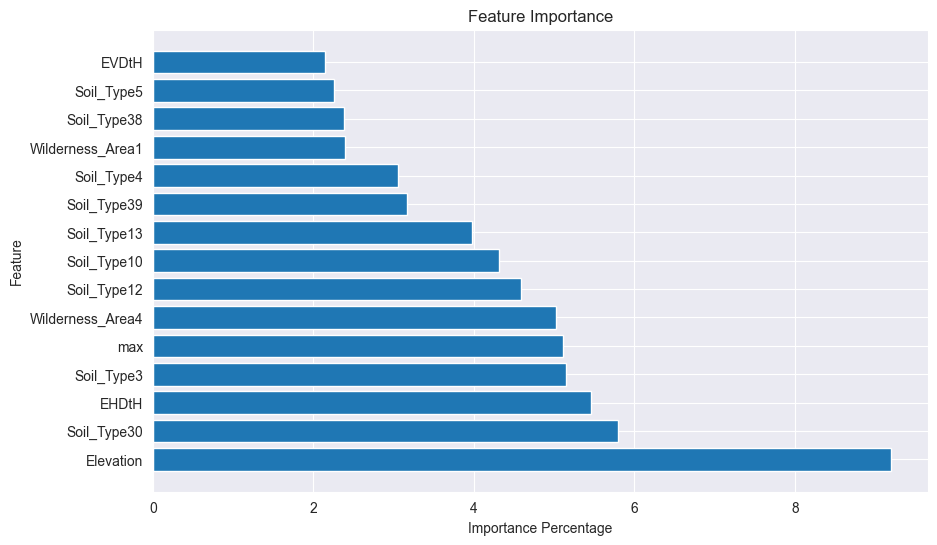

In [82]:
importance_scores = model_xgb.feature_importances_
column_names = X_train.columns

# Calculate the total score
total_score = np.sum(importance_scores)

# Calculate the importance percentages
importance_percentages = (importance_scores / total_score) * 100

# Create a DataFrame to store feature importance percentages and column names
importance_df = pd.DataFrame({'Feature': column_names, 'Importance': importance_percentages})

# Sort the features based on their importance percentages
sorted_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance as percentages
plt.figure(figsize=(10, 6))
plt.barh(sorted_df['Feature'][:15], sorted_df['Importance'][:15])
plt.xlabel('Importance Percentage')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

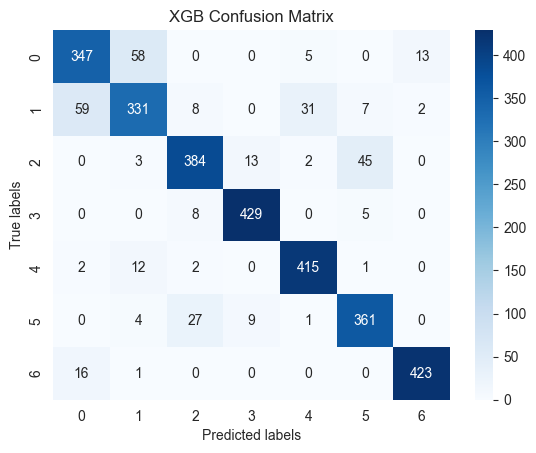

In [83]:
cm_xgb = confusion_matrix(y2,  preds)
sns.heatmap(cm_xgb, annot=True, cmap='Blues', fmt='d')
plt.title('XGB Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#### Ensemble Learning (VotingClassifier)

In [62]:
from sklearn.ensemble import VotingClassifier
voting_classifier = VotingClassifier(
    estimators=[('svm', svc), ('decision_T', decision_Tree),('KNN',KNN),('Random_forest',rf)],
    voting='hard'  # 'hard' for majority voting, 'soft' for weighted averaging
)

In [63]:
voting_classifier.fit(X1, y_train)
y_pred = voting_classifier.predict(X2)
accuracy = accuracy_score(y_valid, y_pred)
accuracy

0.8452380952380952

#### Blending

In [30]:
model1 =xgb.XGBClassifier(**params)
model2 = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', 
                               alpha=0.0001, batch_size='auto', learning_rate='constant',
                               learning_rate_init=0.001, max_iter=200, random_state=42)
model3 = LGBMClassifier(**bestParams)
model4 =RandomForestClassifier(n_estimators=100, random_state=42)

model1.fit(X_train, y1)
model2.fit(X1, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

###predict
pred1=model1.predict(X_valid)
pred2=model2.predict(X2)
pred3=model3.predict(X_valid)
pred4=model4.predict(X_valid)

meta_feature =np.column_stack((pred1,pred2,pred3,pred4)) #pred2,

[LightGBM] [Warning] feature_fraction is set=0.7193204328650403, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7193204328650403
[LightGBM] [Warning] lambda_l1 is set=4.691486862109523e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.691486862109523e-05
[LightGBM] [Warning] lambda_l2 is set=1.801199381594344e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.801199381594344e-05
[LightGBM] [Warning] bagging_fraction is set=0.9514379653658263, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9514379653658263
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7193204328650403, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7193204328650403
[LightGBM] [Warning] lambda_l1 is set=4.691486862109523e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.691486862109523e-05
[LightGBM] [Warning

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [31]:
meta_feature.shape

(3024, 4)

In [32]:
meta_model = RandomForestClassifier(n_estimators=100, random_state=42)
meta_model.fit(meta_feature,y_valid)
meta_pred1 = model1.predict(X_valid)
meta_pred2 = model2.predict(X2)
meta_pred3 = model3.predict(X_valid)
meta_pred4 = model4.predict(X_valid)
meta_test_features=np.column_stack((meta_pred1,meta_pred2,meta_pred3,meta_pred4))
final_prediction = meta_model.predict(meta_test_features)

[LightGBM] [Warning] feature_fraction is set=0.7193204328650403, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7193204328650403
[LightGBM] [Warning] lambda_l1 is set=4.691486862109523e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.691486862109523e-05
[LightGBM] [Warning] lambda_l2 is set=1.801199381594344e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.801199381594344e-05
[LightGBM] [Warning] bagging_fraction is set=0.9514379653658263, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9514379653658263
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


In [33]:
# do well on Bosting but when add mlp decrease accuracy
blending_acc=accuracy_score(y_valid, final_prediction)
blending_acc

0.9166666666666666

In [34]:
import pickle
filename = 'blending_model.pkl'
pickle.dump(meta_model, open(filename, 'wb'))

#### Show Accuracy Table for Removing Outliers Formula

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


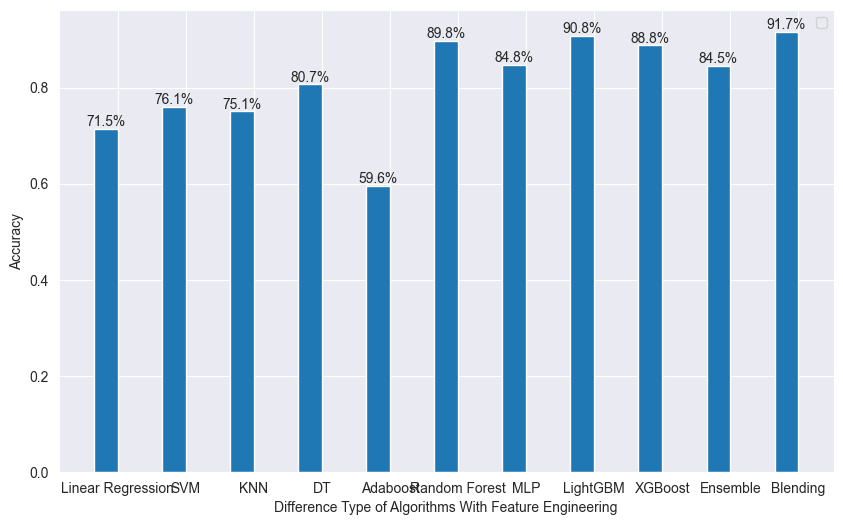

In [64]:
# Algorithms to compare
algorithms = ['Linear Regression', 'SVM', 'KNN', 'DT', 'Adaboost','Random Forest','MLP','LightGBM','XGBoost', 'Ensemble', 'Blending' ]

# mlp_score xg_score ada_score dt_score svr_score knn_score lr_score
acc =[ol_acc, os_acc, ok_acc, od_acc, oa_acc, orf_acc, om_acc, og_acc, ox_acc, accuracy,blending_acc]

# Bar plot comparing precision with and without smoothing
plt.figure(figsize=(10, 6))
width = 0.35
bars1 = plt.bar(np.arange(len(algorithms)), acc, width)
plt.xticks(np.arange(len(algorithms)) + width / 2, algorithms)
plt.xlabel('Difference Type of Algorithms With Feature Engineering')
plt.ylabel('Accuracy')


# Add percentage values on top of each bar
for bar in bars1:
    height1 = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height1, f'{height1:.1%}', ha='center', va='bottom')

plt.legend()
plt.show()

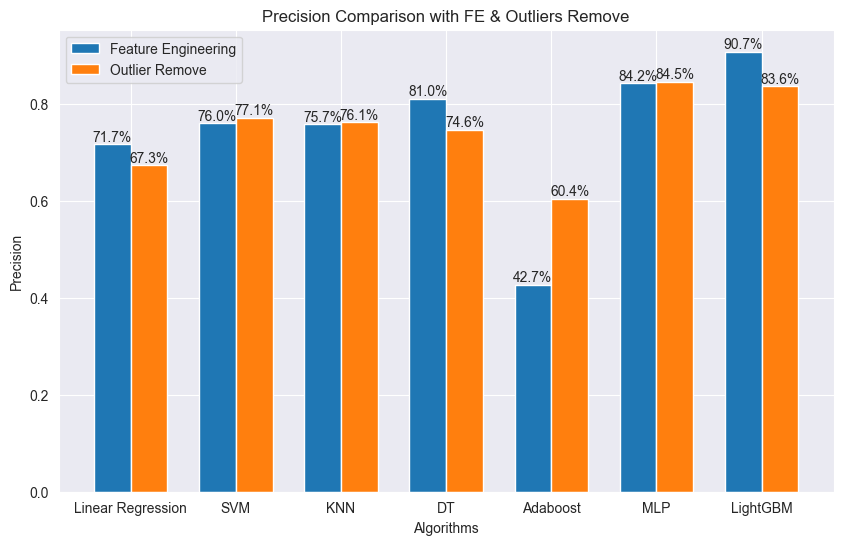

In [95]:
# Algorithms to compare
algorithms =  ['Linear Regression', 'SVM', 'KNN', 'DT', 'Adaboost','MLP','LightGBM']

feature_en =acc =[ol_pre, os_pre, ok_pre, od_pre, oa_pre, om_pre, og_pre]

# Calculate metrics for each algorithm with smoothing
remove_outliers =[gl_pre, gs_pre, gk_pre, gd_pre, ga_pre, gm_pre, gg_pre]

# Bar plot comparing precision with and without smoothing
plt.figure(figsize=(10, 6))
width = 0.35
bars1 = plt.bar(np.arange(len(algorithms)), feature_en, width, label='Feature Engineering')
bars2 = plt.bar(np.arange(len(algorithms)) + width, remove_outliers, width, label='Outlier Remove')
plt.xticks(np.arange(len(algorithms)) + width / 2, algorithms)
plt.xlabel('Algorithms')
plt.ylabel('Precision')
plt.title('Precision Comparison with FE & Outliers Remove')

# Add percentage values on top of each bar
for bar1, bar2 in zip(bars1, bars2):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    plt.text(bar1.get_x() + bar1.get_width() / 2, height1, f'{height1:.1%}', ha='center', va='bottom')
    plt.text(bar2.get_x() + bar2.get_width() / 2, height2, f'{height2:.1%}', ha='center', va='bottom')

plt.legend()
plt.show()


### WorkFlow for Forest Cover-Type Prediction
This notebook describe the dataset with classification technique and apply several model.First did EDA & pre-processing then Feature Engineering then execute several algorithms. Here Introduce two new terms from ensemble learning `Blending & VottingClassifiers`.

**Dataset**
Surprisingly the test portion of this dataset is much bigger than train size. In trining portion there is 15120 rows and 55 columns & all are numerical where test size is 565892.

**EDA**
As usual load dataset, While loading dataset if I load train test dataset together then do all other stuff then my notebook show me the `running out of memory`. No missing value in the dataset. Checking the each class distribution & also each column distribution with scatter plot. Try to find out relatiosnship between colmuns. Here used violin plot to check outliers and solve with zscore

**Normalized vs MinMaxScaler**: Both brings data to the range of 0-1. But handle differently, Normalizer can reduce outliers better than MinMax, MinMax works between Column but Normalizer works on row.

Each & every algorithm here I used with two types of dataset. One is just apply remove after the outliers & another way is feature engineering.

**Linear Classification** Logistic regression basically works better on binary data, faced many dependencies on multiclass classification.its did good on feature enginnering portion rather the removing outliers `0.71759` & `0.677647`.

**SVM :** SVM cannot support multiclass classification natively & works better on binary classification and small dataset. So in multiclass classification same execuation is applicable, it break data from multi-class problem to multi-binary problems.

**KNN :** Main advantage of using KNN is it support multiclass classification. Basically it do better on multiclass classification and achieve better score. this model did well on this dataset too `76025` achived.

**Decsion Tree** More important of this model is, its work better on both side data. 

**AdaBoost** In the terms of adaboost it made for binary classification but in the case of multiclass classification it work better on variation of data. In this dataset it works very bad which is `0.5145`. 

**Random Forest** My second best model in this dataset which also boost the accuracy on blending.

**MLP** This algorithm varied on difference sector to works, Sometimes did better on simple dataset & not do well on complex dataset. For this dataset it works prety well and given decent acuracy which is 
`0.84093`

**LightGBM** The winner of this dataset. It work best with Parameter tuning with Optuna and feature engineerng `0.905092`.

**Result**
Worked difference types of model and from the uppor portion we know that every model have difference dependencies and difference working formula. So in this dataset work good on LightGBM and bad with Adaboost. More interesting thing is LightGBM works better than Voting but not blending. How our blending accuracy is `0.90806`

**Motivation**
In tabular classification problem main part is feature engineering. If anyone can findout better feature then a simple model can be the game changer. Did feature engineering but this dataset is very tricky and tried to do well.Try to solve the skewness and apply Pseudo-labeling. Will check apply one or two more model in the blending section then differenciate the accuracy.
